In [1]:
import os
import numpy as np
import xarray as xr
import geopandas as gpd
import clima_anom as ca

import shapely.vectorized as sv

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down
from function import DOWN_raw

In [2]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [5,  10,  20,  50, 100, 200]
Fi = 1 - 1/np.array(Tr)

In [3]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson')) 
    ITALY = gpd.read_file(os.path.join(veneto_dir,'Italy_clear.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [4]:
sat_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite')
down_base = os.path.join(sat_base,'5_DOWN')
down_corrected = os.path.join(sat_base, '6_DOWN_BCorrected')
ENS_base = os.path.join(sat_base,'5_ENSEMBLE')

In [5]:
italy_geom = ITALY.union_all()

In [6]:
product, time_reso = 'IMERG', '1dy'
dir_in = os.path.join(down_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dIM, lat2dIM = np.meshgrid(DATA.lon.data, DATA.lat.data)

mask_italy = sv.contains(italy_geom, lon2dIM, lat2dIM)
NYd_IM = DATA.NYd.where(mask_italy)
CYd_IM = DATA.CYd.where(mask_italy)
WYd_IM = DATA.WYd.where(mask_italy)

NYd_IM_std = NYd_IM.std(dim='year', skipna=True)
CYd_IM_std = CYd_IM.std(dim='year', skipna=True)
WYd_IM_std = WYd_IM.std(dim='year', skipna=True)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [7]:
product, time_reso = 'CMORPH', '3h'
dir_in = os.path.join(down_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dCM, lat2dCM = np.meshgrid(DATA.lon.data, DATA.lat.data)

mask_italy = sv.contains(italy_geom, lon2dCM, lat2dCM)
NYd_CM = DATA.NYd.where(mask_italy)
CYd_CM = DATA.CYd.where(mask_italy)
WYd_CM = DATA.WYd.where(mask_italy)

NYd_CM_std = NYd_CM.std(dim='year', skipna=True)
CYd_CM_std = CYd_CM.std(dim='year', skipna=True)
WYd_CM_std = WYd_CM.std(dim='year', skipna=True)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [8]:
product, time_reso = 'ERA5', '3h'
dir_in = os.path.join(down_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dER, lat2dER = np.meshgrid(DATA.lon.data, DATA.lat.data)

mask_italy = sv.contains(italy_geom, lon2dER, lat2dER)
NYd_ER = DATA.NYd.where(mask_italy)
CYd_ER = DATA.CYd.where(mask_italy)
WYd_ER = DATA.WYd.where(mask_italy)

NYd_ER_std = NYd_ER.std(dim='year', skipna=True)
CYd_ER_std = CYd_ER.std(dim='year', skipna=True)
WYd_ER_std = WYd_ER.std(dim='year', skipna=True)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [9]:
product, time_reso = 'MSWEP', '3h'
dir_in = os.path.join(down_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dMS, lat2dMS = np.meshgrid(DATA.lon.data, DATA.lat.data)

mask_italy = sv.contains(italy_geom, lon2dMS, lat2dMS)
NYd_MS = DATA.NYd.where(mask_italy)
CYd_MS = DATA.CYd.where(mask_italy)
WYd_MS = DATA.WYd.where(mask_italy)

NYd_MS_std = NYd_MS.std(dim='year', skipna=True)
CYd_MS_std = CYd_MS.std(dim='year', skipna=True)
WYd_MS_std = WYd_MS.std(dim='year', skipna=True)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [10]:
product, time_reso = 'CHIRPS', '1dy'
dir_in = os.path.join(down_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dCH, lat2dCH = np.meshgrid(DATA.lon.data, DATA.lat.data)

mask_italy = sv.contains(italy_geom, lon2dCH, lat2dCH)
NYd_CH = DATA.NYd.where(mask_italy)
CYd_CH = DATA.CYd.where(mask_italy)
WYd_CH = DATA.WYd.where(mask_italy)

NYd_CH_std = NYd_CH.std(dim='year', skipna=True)
CYd_CH_std = CYd_CH.std(dim='year', skipna=True)
WYd_CH_std = WYd_CH.std(dim='year', skipna=True)

NYd_CH_std = np.where(NYd_CH_std==0,np.nan,NYd_CH_std)
CYd_CH_std = np.where(CYd_CH_std==0,np.nan,CYd_CH_std)
WYd_CH_std = np.where(WYd_CH_std==0,np.nan,WYd_CH_std)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [11]:
product, time_reso = 'GSMaP', '3h'
dir_in = os.path.join(down_base, f'ITALY_DOWN_{product}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc')

DATA = xr.open_dataset(dir_in)

lon2dGS, lat2dGS = np.meshgrid(DATA.lon.data, DATA.lat.data)

mask_italy = sv.contains(italy_geom, lon2dGS, lat2dGS)
NYd_GS = DATA.NYd.where(mask_italy)
CYd_GS = DATA.CYd.where(mask_italy)
WYd_GS = DATA.WYd.where(mask_italy)

NYd_GS_std = NYd_GS.std(dim='year', skipna=True)
CYd_GS_std = CYd_GS.std(dim='year', skipna=True)
WYd_GS_std = WYd_GS.std(dim='year', skipna=True)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [12]:
ENSEMBLE_SAT = 'ALL'
product, time_reso = 'ENSEMBLE_mean', '1dy'
dir_in = os.path.join(ENS_base,f'ITALY_ENSEMBLE_{ENSEMBLE_SAT}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_mean.nc')

DATA = xr.open_dataset(dir_in)

lon2dEN, lat2dEN = np.meshgrid(DATA.lon.data, DATA.lat.data)

mask_italy = sv.contains(italy_geom, lon2dEN, lat2dEN)
NYd_EN_mean = DATA.NYd.where(mask_italy)
CYd_EN_mean = DATA.CYd.where(mask_italy)
WYd_EN_mean = DATA.WYd.where(mask_italy)

NYd_EN_mean_std = NYd_EN_mean.std(dim='year', skipna=True)
CYd_EN_mean_std = CYd_EN_mean.std(dim='year', skipna=True)
WYd_EN_mean_std = WYd_EN_mean.std(dim='year', skipna=True)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [13]:
ENSEMBLE_SAT = 'ALL'
product, time_reso = 'ENSEMBLE_median', '1dy'
dir_in = os.path.join(ENS_base,f'ITALY_ENSEMBLE_{ENSEMBLE_SAT}_{time_reso}_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_median.nc')

DATA = xr.open_dataset(dir_in)

NYd_EN_median = DATA.NYd.where(mask_italy)
CYd_EN_median = DATA.CYd.where(mask_italy)
WYd_EN_median = DATA.WYd.where(mask_italy)

NYd_EN_median_std = NYd_EN_median.std(dim='year', skipna=True)
CYd_EN_median_std = CYd_EN_median.std(dim='year', skipna=True)
WYd_EN_median_std = WYd_EN_median.std(dim='year', skipna=True)

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


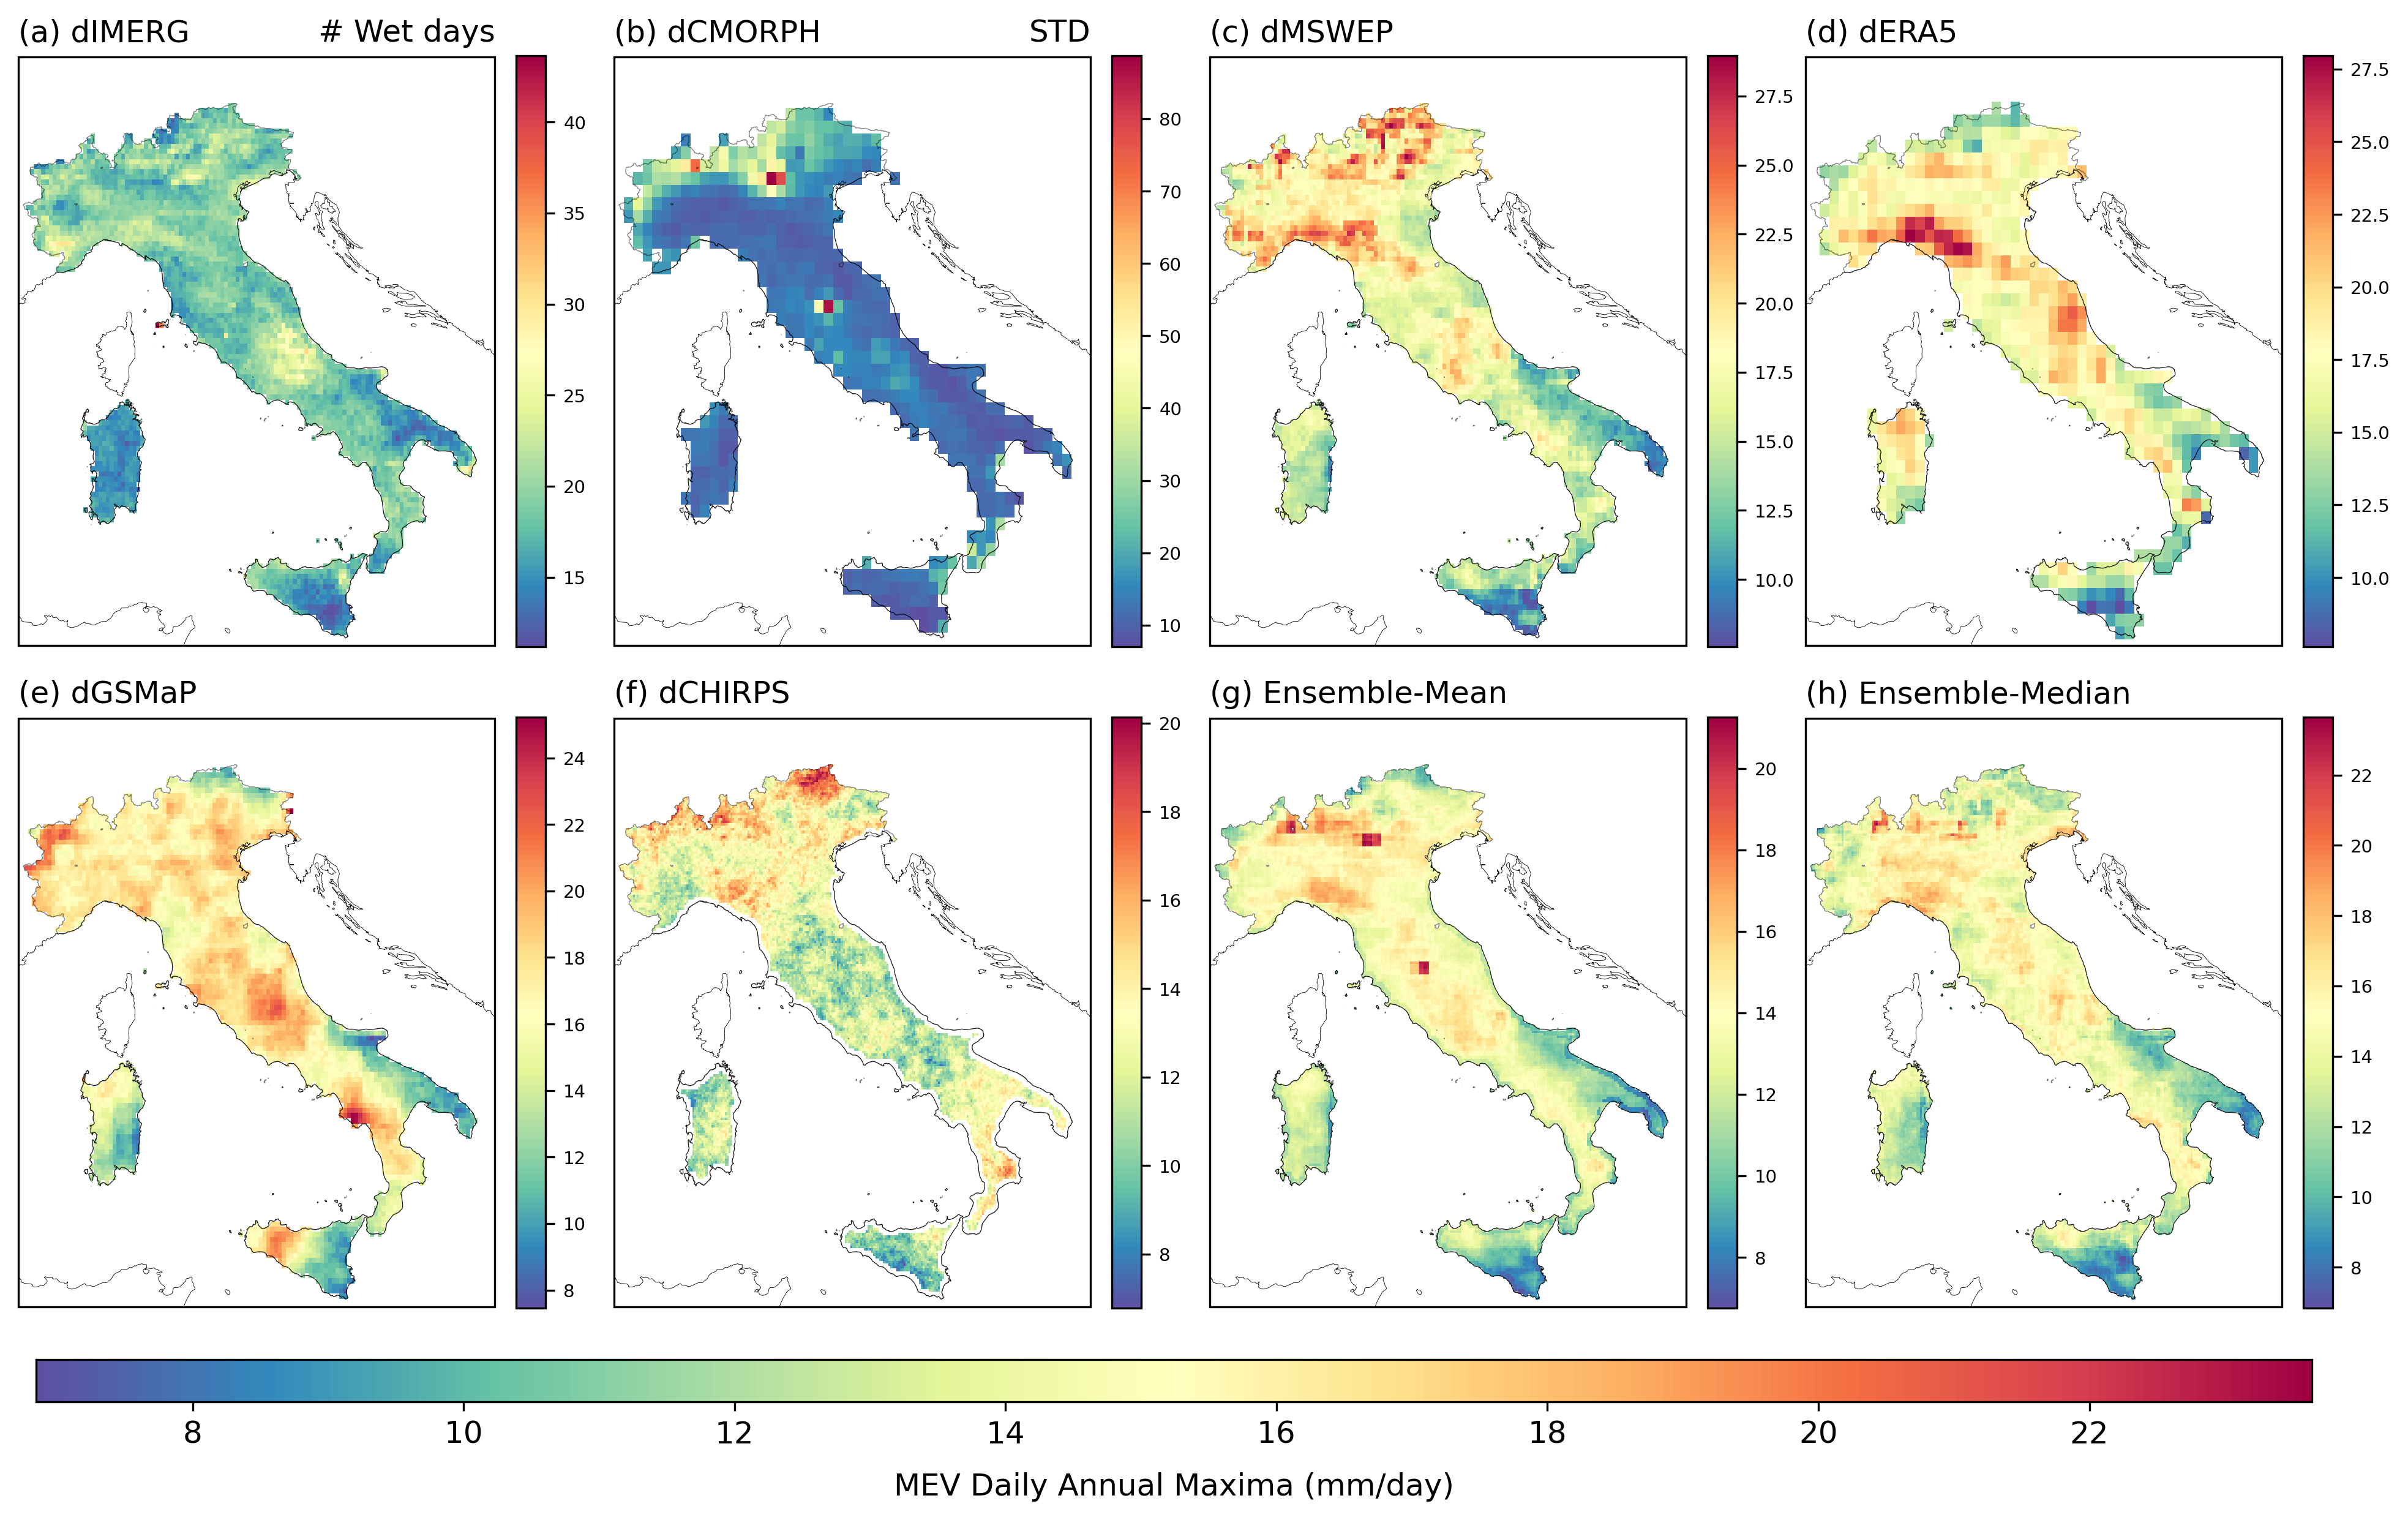

In [14]:
fonttitle = 12

Mev_levels = None
Mev_cmap = plt.cm.Spectral_r
Mev_diff = plt.cm.coolwarm_r
norm = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(14,8),dpi=300)
gs = gridspec.GridSpec(2,4)

axes = []
for nraw in range(2):
    for ncol in range(4):
        ax = fig.add_subplot(gs[nraw, ncol], projection=proj)
        ITALY.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.3, zorder=21, alpha=0.5)
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        ax.coastlines(linewidth=0.2)
        axes.append(ax)

a1 = axes[0].pcolormesh(lon2dIM, lat2dIM, NYd_IM_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[0], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[1].pcolormesh(lon2dCM, lat2dCM, NYd_CM_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[1], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[2].pcolormesh(lon2dMS, lat2dMS, NYd_MS_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[2], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[3].pcolormesh(lon2dER, lat2dER, NYd_ER_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[3], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[4].pcolormesh(lon2dGS, lat2dGS, NYd_GS_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[4], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[5].pcolormesh(lon2dCH, lat2dCH, NYd_CH_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[5], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[6].pcolormesh(lon2dEN, lat2dEN, NYd_EN_mean_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[6], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[7].pcolormesh(lon2dEN, lat2dEN, NYd_EN_median_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[7], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

axes[0].set_title('(a) dIMERG', fontsize=fonttitle, loc='left')
axes[0].set_title('# Wet days', fontsize=fonttitle, loc='right')
axes[1].set_title('(b) dCMORPH', fontsize=fonttitle, loc='left')
axes[1].set_title('STD', fontsize=fonttitle, loc='right')
axes[2].set_title('(c) dMSWEP', fontsize=fonttitle, loc='left')
axes[3].set_title('(d) dERA5', fontsize=fonttitle, loc='left')
axes[4].set_title('(e) dGSMaP', fontsize=fonttitle, loc='left')
axes[5].set_title('(f) dCHIRPS', fontsize=fonttitle, loc='left')
axes[6].set_title('(g) Ensemble-Mean', fontsize=fonttitle, loc='left')
axes[7].set_title('(h) Ensemble-Median', fontsize=fonttitle, loc='left')

cbar_ax = fig.add_axes([0.057, 0.01, 0.885, 0.029]) # Horizontal
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=12)
cbar.set_label("MEV Daily Annual Maxima (mm/day)", fontsize=12, labelpad=9)

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.13, hspace=0)


TypeError: 'norm' must be an instance of matplotlib.colors.Normalize, str or None, not a numpy.ndarray

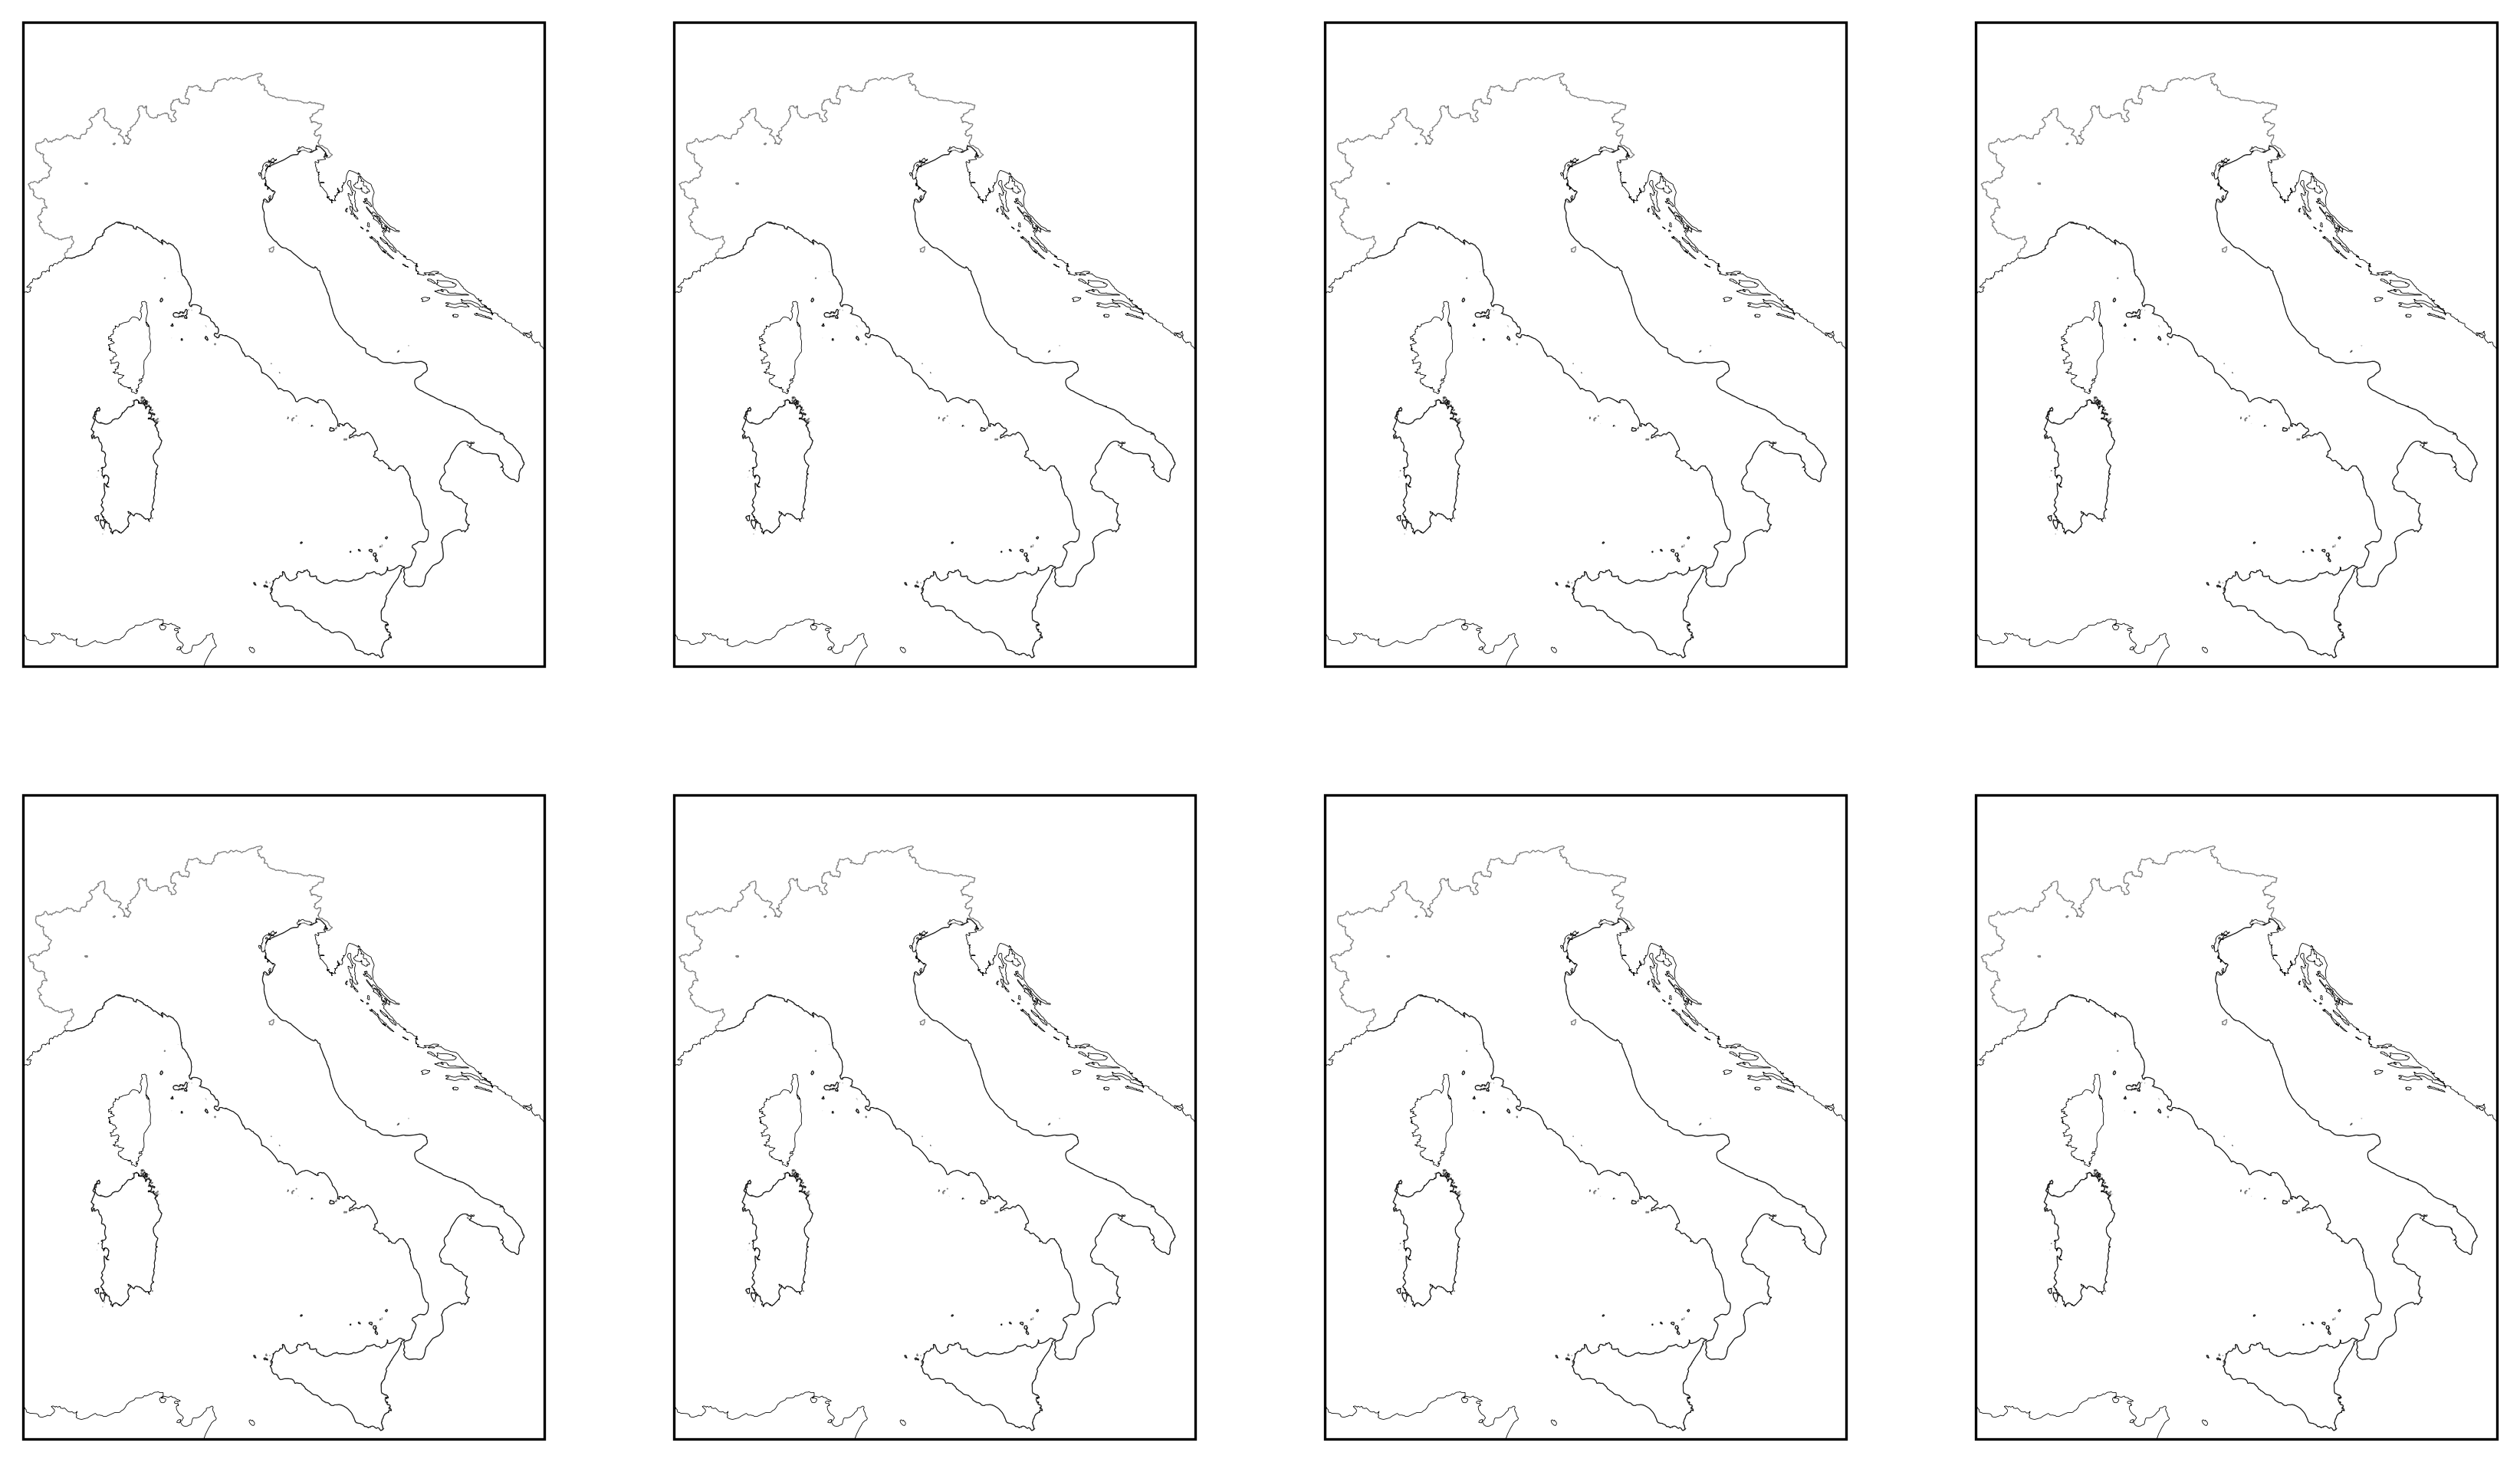

In [ ]:
fonttitle = 12

Mev_levels = None
Mev_cmap = plt.cm.Spectral_r
Mev_diff = plt.cm.coolwarm_r
norm = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(14,8),dpi=300)
gs = gridspec.GridSpec(2,4)

axes = []
for nraw in range(2):
    for ncol in range(4):
        ax = fig.add_subplot(gs[nraw, ncol], projection=proj)
        ITALY.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.3, zorder=21, alpha=0.5)
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        ax.coastlines(linewidth=0.2)
        axes.append(ax)

a1 = axes[0].pcolormesh(lon2dIM, lat2dIM, CYd_IM_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[0], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[1].pcolormesh(lon2dCM, lat2dCM, CYd_CM_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[1], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[2].pcolormesh(lon2dMS, lat2dMS, CYd_MS_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[2], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[3].pcolormesh(lon2dER, lat2dER, CYd_ER_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[3], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[4].pcolormesh(lon2dGS, lat2dGS, CYd_GS_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[4], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[5].pcolormesh(lon2dCH, lat2dCH, CYd_CH_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[5], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[6].pcolormesh(lon2dEN, lat2dEN, CYd_EN_mean_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[6], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[7].pcolormesh(lon2dEN, lat2dEN, CYd_EN_median_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[7], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

axes[0].set_title('(a) dIMERG', fontsize=fonttitle, loc='left')
axes[0].set_title('Scale parameter', fontsize=fonttitle, loc='right')
axes[1].set_title('(b) dCMORPH', fontsize=fonttitle, loc='left')
axes[1].set_title('STD', fontsize=fonttitle, loc='right')
axes[2].set_title('(c) dMSWEP', fontsize=fonttitle, loc='left')
axes[3].set_title('(d) dERA5', fontsize=fonttitle, loc='left')
axes[4].set_title('(e) dGSMaP', fontsize=fonttitle, loc='left')
axes[5].set_title('(f) dCHIRPS', fontsize=fonttitle, loc='left')
axes[6].set_title('(g) Ensemble-Mean', fontsize=fonttitle, loc='left')
axes[7].set_title('(h) Ensemble-Median', fontsize=fonttitle, loc='left')

cbar_ax = fig.add_axes([0.057, 0.01, 0.885, 0.029]) # Horizontal
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=12)
cbar.set_label("MEV Daily Annual Maxima (mm/day)", fontsize=12, labelpad=9)

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.13, hspace=0)


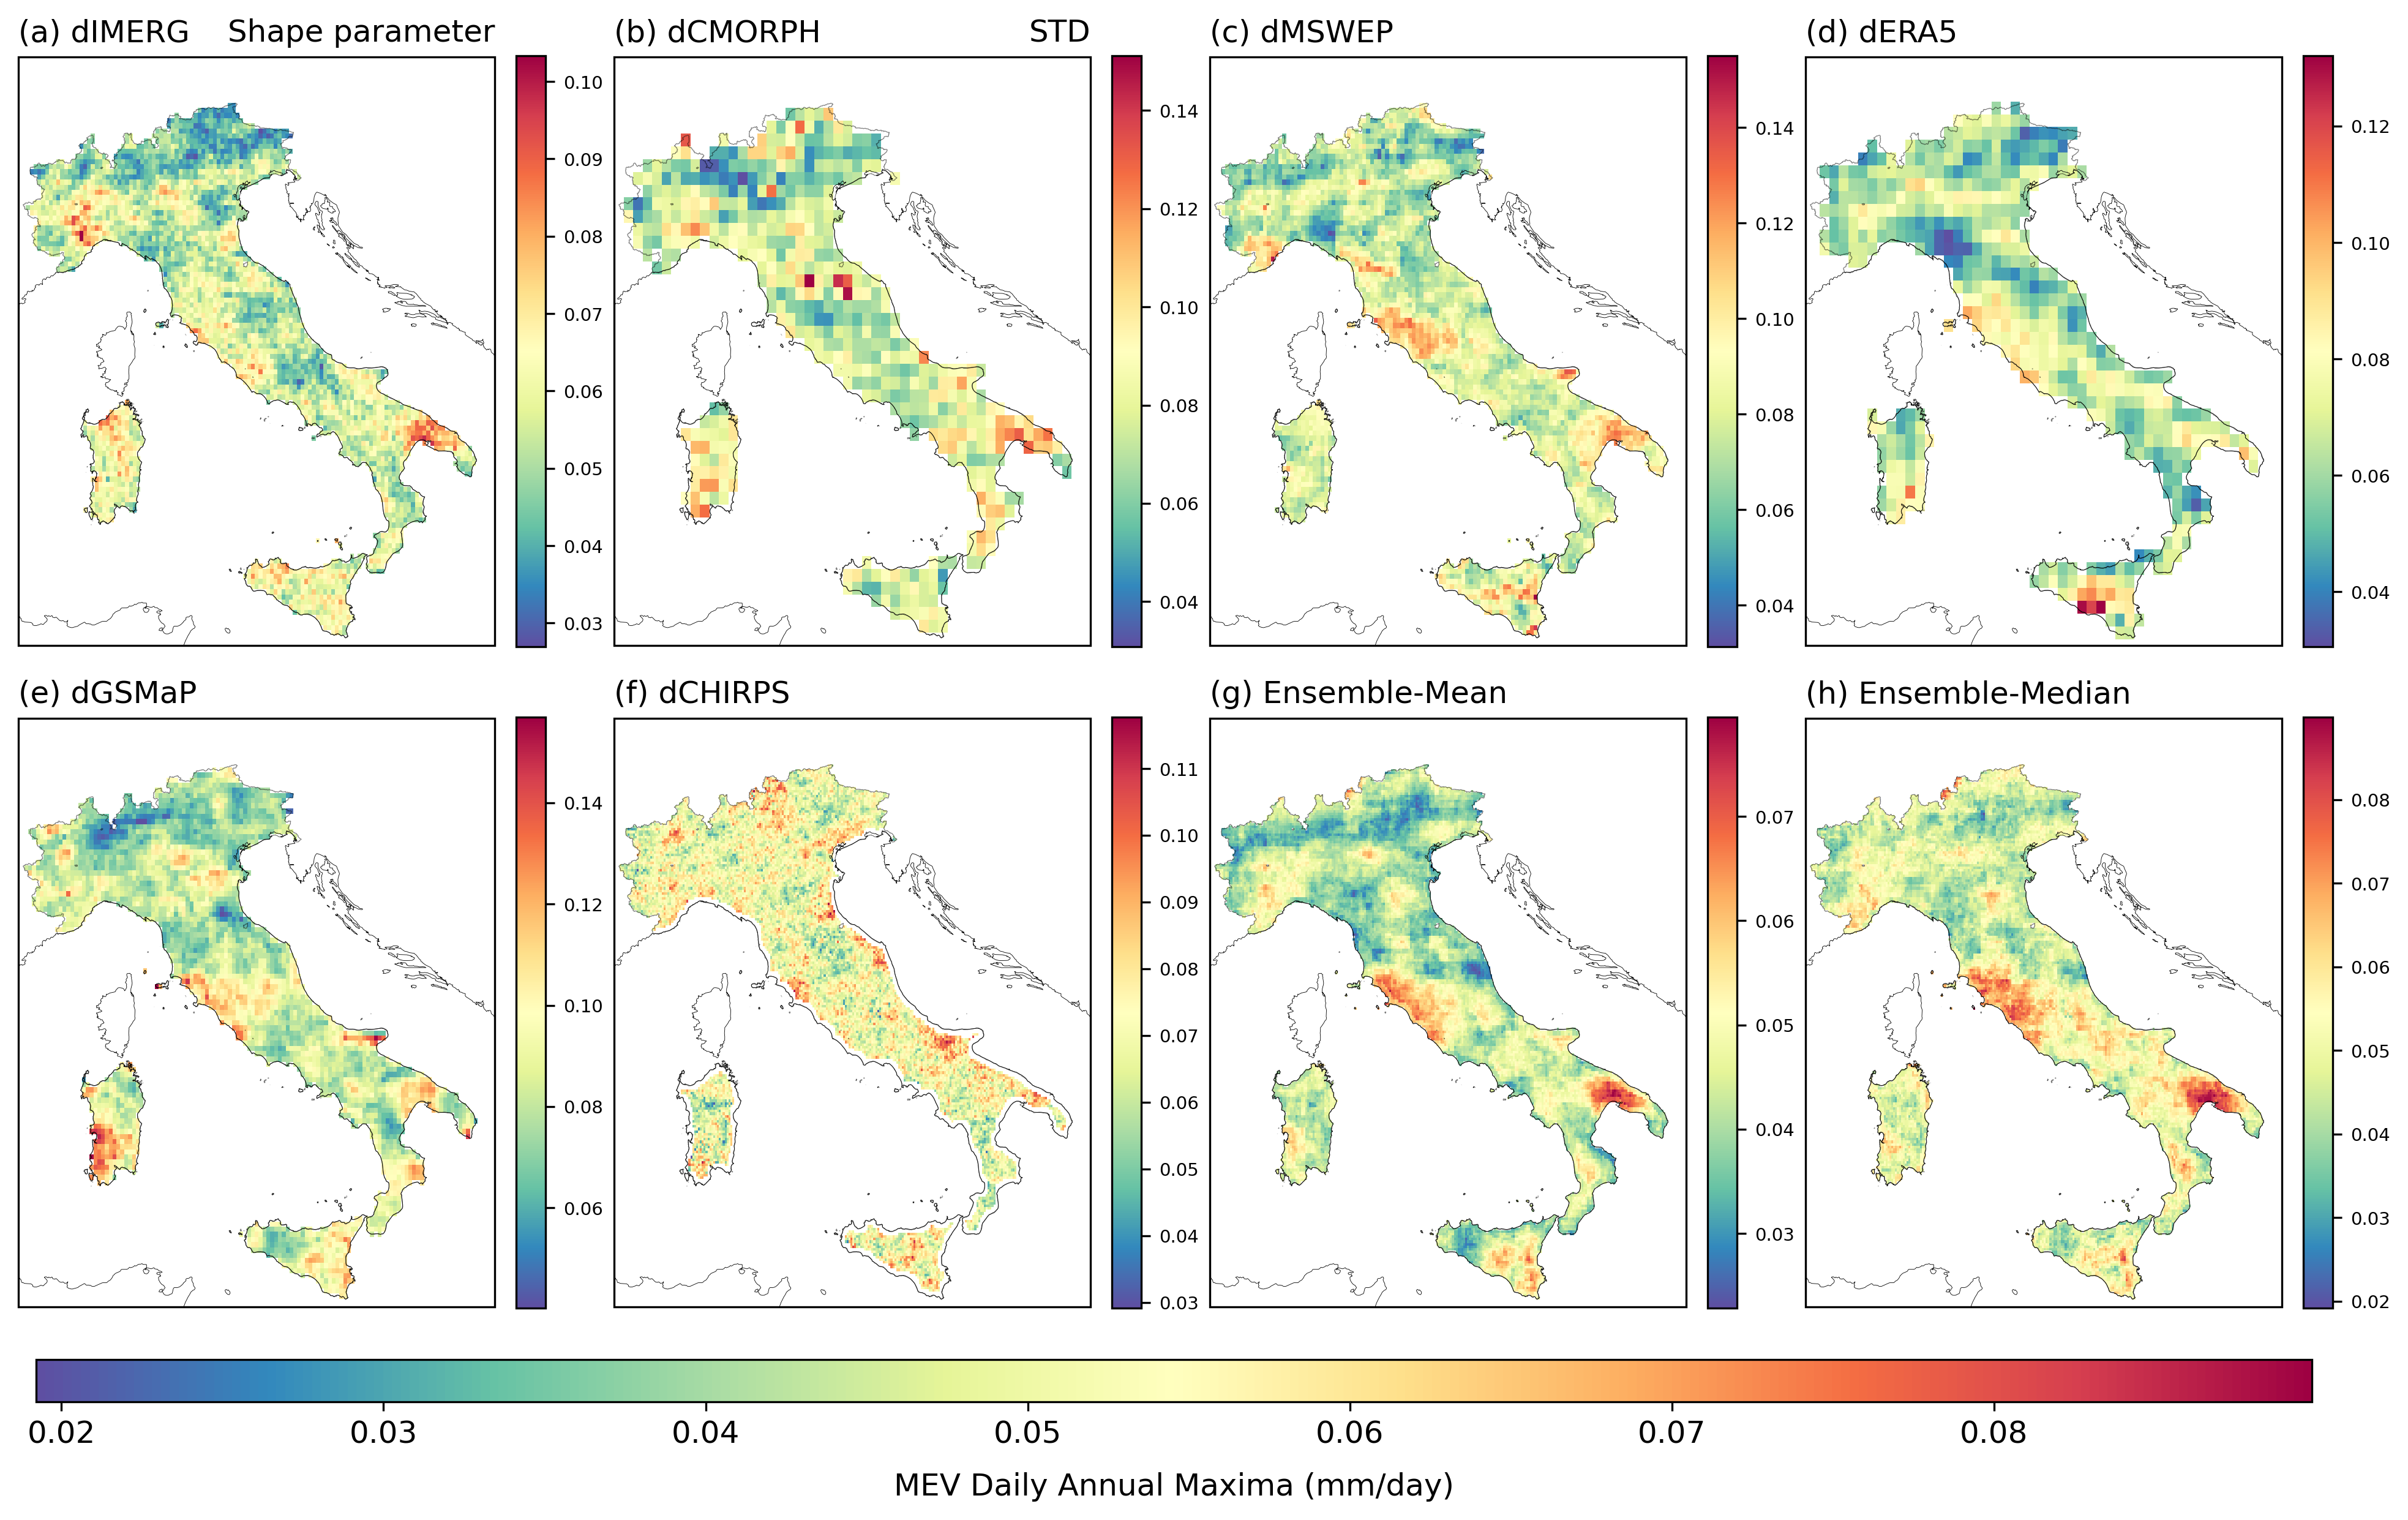

In [16]:
fonttitle = 12

Mev_levels = None
Mev_cmap = plt.cm.Spectral_r
Mev_diff = plt.cm.coolwarm_r
norm = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(14,8),dpi=300)
gs = gridspec.GridSpec(2,4)

axes = []
for nraw in range(2):
    for ncol in range(4):
        ax = fig.add_subplot(gs[nraw, ncol], projection=proj)
        ITALY.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.3, zorder=21, alpha=0.5)
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        ax.coastlines(linewidth=0.2)
        axes.append(ax)

a1 = axes[0].pcolormesh(lon2dIM, lat2dIM, WYd_IM_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[0], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[1].pcolormesh(lon2dCM, lat2dCM, WYd_CM_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[1], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[2].pcolormesh(lon2dMS, lat2dMS, WYd_MS_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[2], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[3].pcolormesh(lon2dER, lat2dER, WYd_ER_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[3], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[4].pcolormesh(lon2dGS, lat2dGS, WYd_GS_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[4], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[5].pcolormesh(lon2dCH, lat2dCH, WYd_CH_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[5], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[6].pcolormesh(lon2dEN, lat2dEN, WYd_EN_mean_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[6], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

a1 = axes[7].pcolormesh(lon2dEN, lat2dEN, WYd_EN_median_std, cmap=Mev_cmap, norm=norm)
cbar = plt.colorbar(a1, ax=axes[7], fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=7)

axes[0].set_title('(a) dIMERG', fontsize=fonttitle, loc='left')
axes[0].set_title('Shape parameter', fontsize=fonttitle, loc='right')
axes[1].set_title('(b) dCMORPH', fontsize=fonttitle, loc='left')
axes[1].set_title('STD', fontsize=fonttitle, loc='right')
axes[2].set_title('(c) dMSWEP', fontsize=fonttitle, loc='left')
axes[3].set_title('(d) dERA5', fontsize=fonttitle, loc='left')
axes[4].set_title('(e) dGSMaP', fontsize=fonttitle, loc='left')
axes[5].set_title('(f) dCHIRPS', fontsize=fonttitle, loc='left')
axes[6].set_title('(g) Ensemble-Mean', fontsize=fonttitle, loc='left')
axes[7].set_title('(h) Ensemble-Median', fontsize=fonttitle, loc='left')

cbar_ax = fig.add_axes([0.057, 0.01, 0.885, 0.029]) # Horizontal
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=12)
cbar.set_label("MEV Daily Annual Maxima (mm/day)", fontsize=12, labelpad=9)

# ===========================================================================================================================================================================
# ===========================================================================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.13, hspace=0)


In [62]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

In [158]:
NYd_IM.values.flatten()

array([nan, nan, nan, ..., nan, nan, nan])

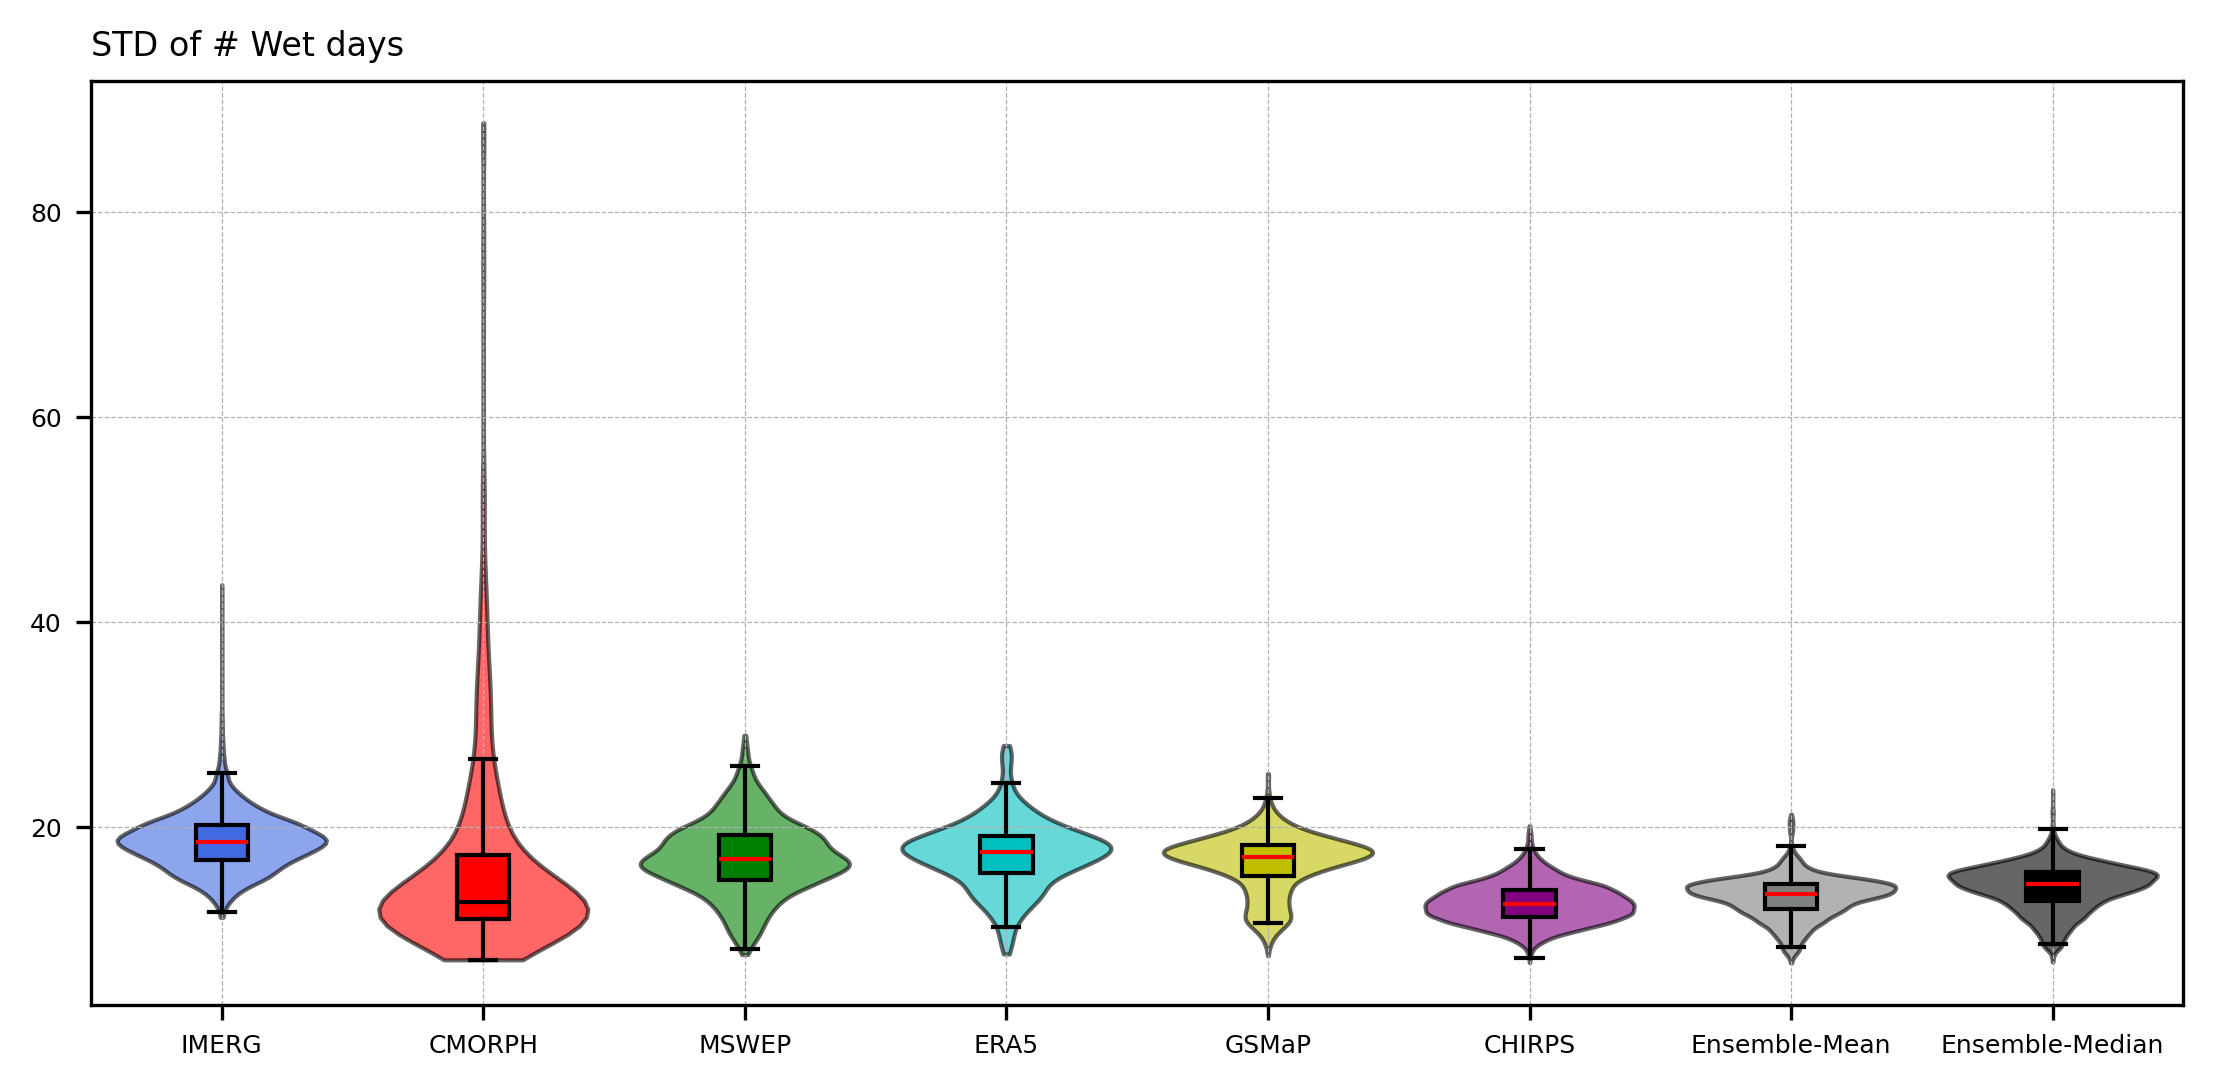

In [166]:
box_width = 0.8
x_pos = np.arange(0.5,41,2)

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])
NYd_IM_std_flat = NYd_IM_std.values.flatten()
NYd_IM_std_rdy = NYd_IM_std_flat[~np.isnan(NYd_IM_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_IM_std_rdy,
    positions=[0],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[0])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_IM_std_rdy,
    positions=[0],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[0], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_CM_std_flat = NYd_CM_std.values.flatten()
NYd_CM_std_rdy = NYd_CM_std_flat[~np.isnan(NYd_CM_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_CM_std_rdy,
    positions=[1],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[1])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_CM_std_rdy,
    positions=[1],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[1], edgecolor='k'),
    medianprops=dict(color='k')
)

# ==========================================================================================
NYd_MS_std_flat = NYd_MS_std.values.flatten()
NYd_MS_std_rdy = NYd_MS_std_flat[~np.isnan(NYd_MS_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_MS_std_rdy,
    positions=[2],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[2])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_MS_std_rdy,
    positions=[2],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[2], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_ER_std_flat = NYd_ER_std.values.flatten()
NYd_ER_std_rdy = NYd_ER_std_flat[~np.isnan(NYd_ER_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_ER_std_rdy,
    positions=[3],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[3])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_ER_std_rdy,
    positions=[3],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[3], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_GS_std_flat = NYd_GS_std.values.flatten()
NYd_GS_std_rdy = NYd_GS_std_flat[~np.isnan(NYd_GS_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_GS_std_rdy,
    positions=[4],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[4])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_GS_std_rdy,
    positions=[4],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[4], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_CH_std_flat = NYd_CH_std.flatten()
NYd_CH_std_rdy = NYd_CH_std_flat[~np.isnan(NYd_CH_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_CH_std_rdy,
    positions=[5],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[5])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_CH_std_rdy,
    positions=[5],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[5], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_EN_mean_std_flat = NYd_EN_mean_std.values.flatten()
NYd_EN_mean_std_rdy = NYd_EN_mean_std_flat[~np.isnan(NYd_EN_mean_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('gray')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='gray', edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_EN_median_std_flat = NYd_EN_median_std.values.flatten()
NYd_EN_median_std_rdy = NYd_EN_median_std_flat[~np.isnan(NYd_EN_median_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('k')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='k', edgecolor='k'),
    medianprops=dict(color='r')
)

ax1.tick_params(axis='both', which='major', labelsize=6)

ax1.set_xticks(np.arange(8))
ax1.set_xticklabels(['IMERG','CMORPH','MSWEP','ERA5','GSMaP','CHIRPS','Ensemble-Mean','Ensemble-Median'])

# ==========================================================================================
ax1.set_title('STD of # Wet days', fontsize=8, loc='left')
plt.grid(linewidth=0.3, linestyle='--')
# ax1.set_ylim(5,60)

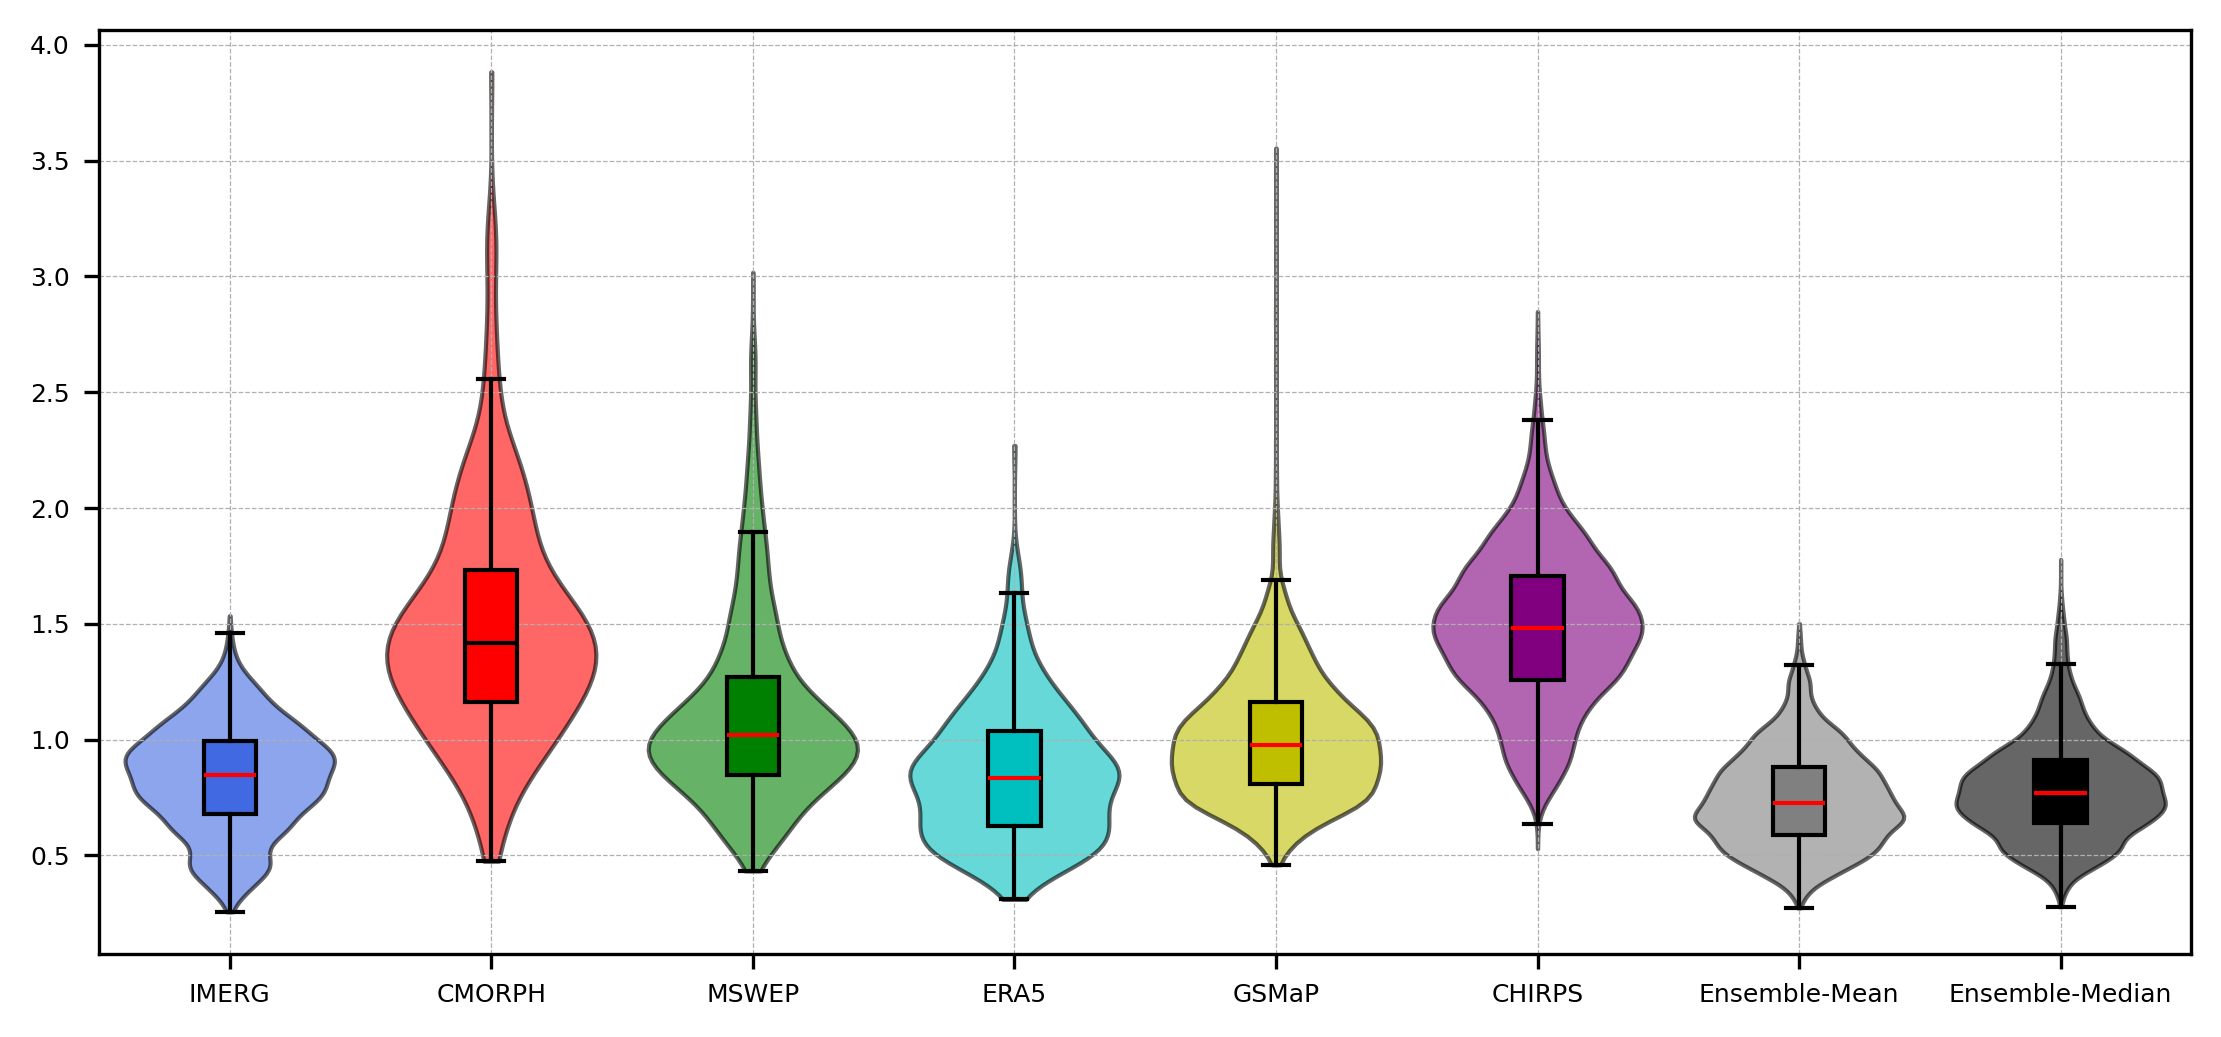

In [165]:
box_width = 0.8
x_pos = np.arange(0.5,41,2)

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])

meanprops=dict(linestyle='-',color="g",linewidth=1.5)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='r')

CYd_IM_std_flat = CYd_IM_std.values.flatten()
CYd_IM_std_rdy = CYd_IM_std_flat[~np.isnan(CYd_IM_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_IM_std_rdy,
    positions=[0],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[0])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_IM_std_rdy,
    positions=[0],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[0], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_CM_std_flat = CYd_CM_std.values.flatten()
CYd_CM_std_rdy = CYd_CM_std_flat[~np.isnan(CYd_CM_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_CM_std_rdy,
    positions=[1],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[1])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_CM_std_rdy,
    positions=[1],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[1], edgecolor='k'),
    medianprops=dict(color='k')
)

# ==========================================================================================
CYd_MS_std_flat = CYd_MS_std.values.flatten()
CYd_MS_std_rdy = CYd_MS_std_flat[~np.isnan(CYd_MS_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_MS_std_rdy,
    positions=[2],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[2])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_MS_std_rdy,
    positions=[2],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[2], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_ER_std_flat = CYd_ER_std.values.flatten()
CYd_ER_std_rdy = CYd_ER_std_flat[~np.isnan(CYd_ER_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_ER_std_rdy,
    positions=[3],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[3])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_ER_std_rdy,
    positions=[3],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[3], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_GS_std_flat = CYd_GS_std.values.flatten()
CYd_GS_std_rdy = CYd_GS_std_flat[~np.isnan(CYd_GS_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_GS_std_rdy,
    positions=[4],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[4])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_GS_std_rdy,
    positions=[4],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[4], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_CH_std_flat = CYd_CH_std.flatten()
CYd_CH_std_rdy = CYd_CH_std_flat[~np.isnan(CYd_CH_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_CH_std_rdy,
    positions=[5],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[5])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_CH_std_rdy,
    positions=[5],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[5], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_EN_mean_std_flat = CYd_EN_mean_std.values.flatten()
CYd_EN_mean_std_rdy = CYd_EN_mean_std_flat[~np.isnan(CYd_EN_mean_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('gray')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='gray', edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_EN_median_std_flat = CYd_EN_median_std.values.flatten()
CYd_EN_median_std_rdy = CYd_EN_median_std_flat[~np.isnan(CYd_EN_median_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('k')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='k', edgecolor='k'),
    medianprops=dict(color='r')
)

ax1.tick_params(axis='both', which='major', labelsize=6)

ax1.set_xticks(np.arange(8))
ax1.set_xticklabels(['IMERG','CMORPH','MSWEP','ERA5','GSMaP','CHIRPS','Ensemble-Mean','Ensemble-Median'])

# ==========================================================================================
plt.grid(linewidth=0.3, linestyle='--')
# ax1.set_ylim(5,60)

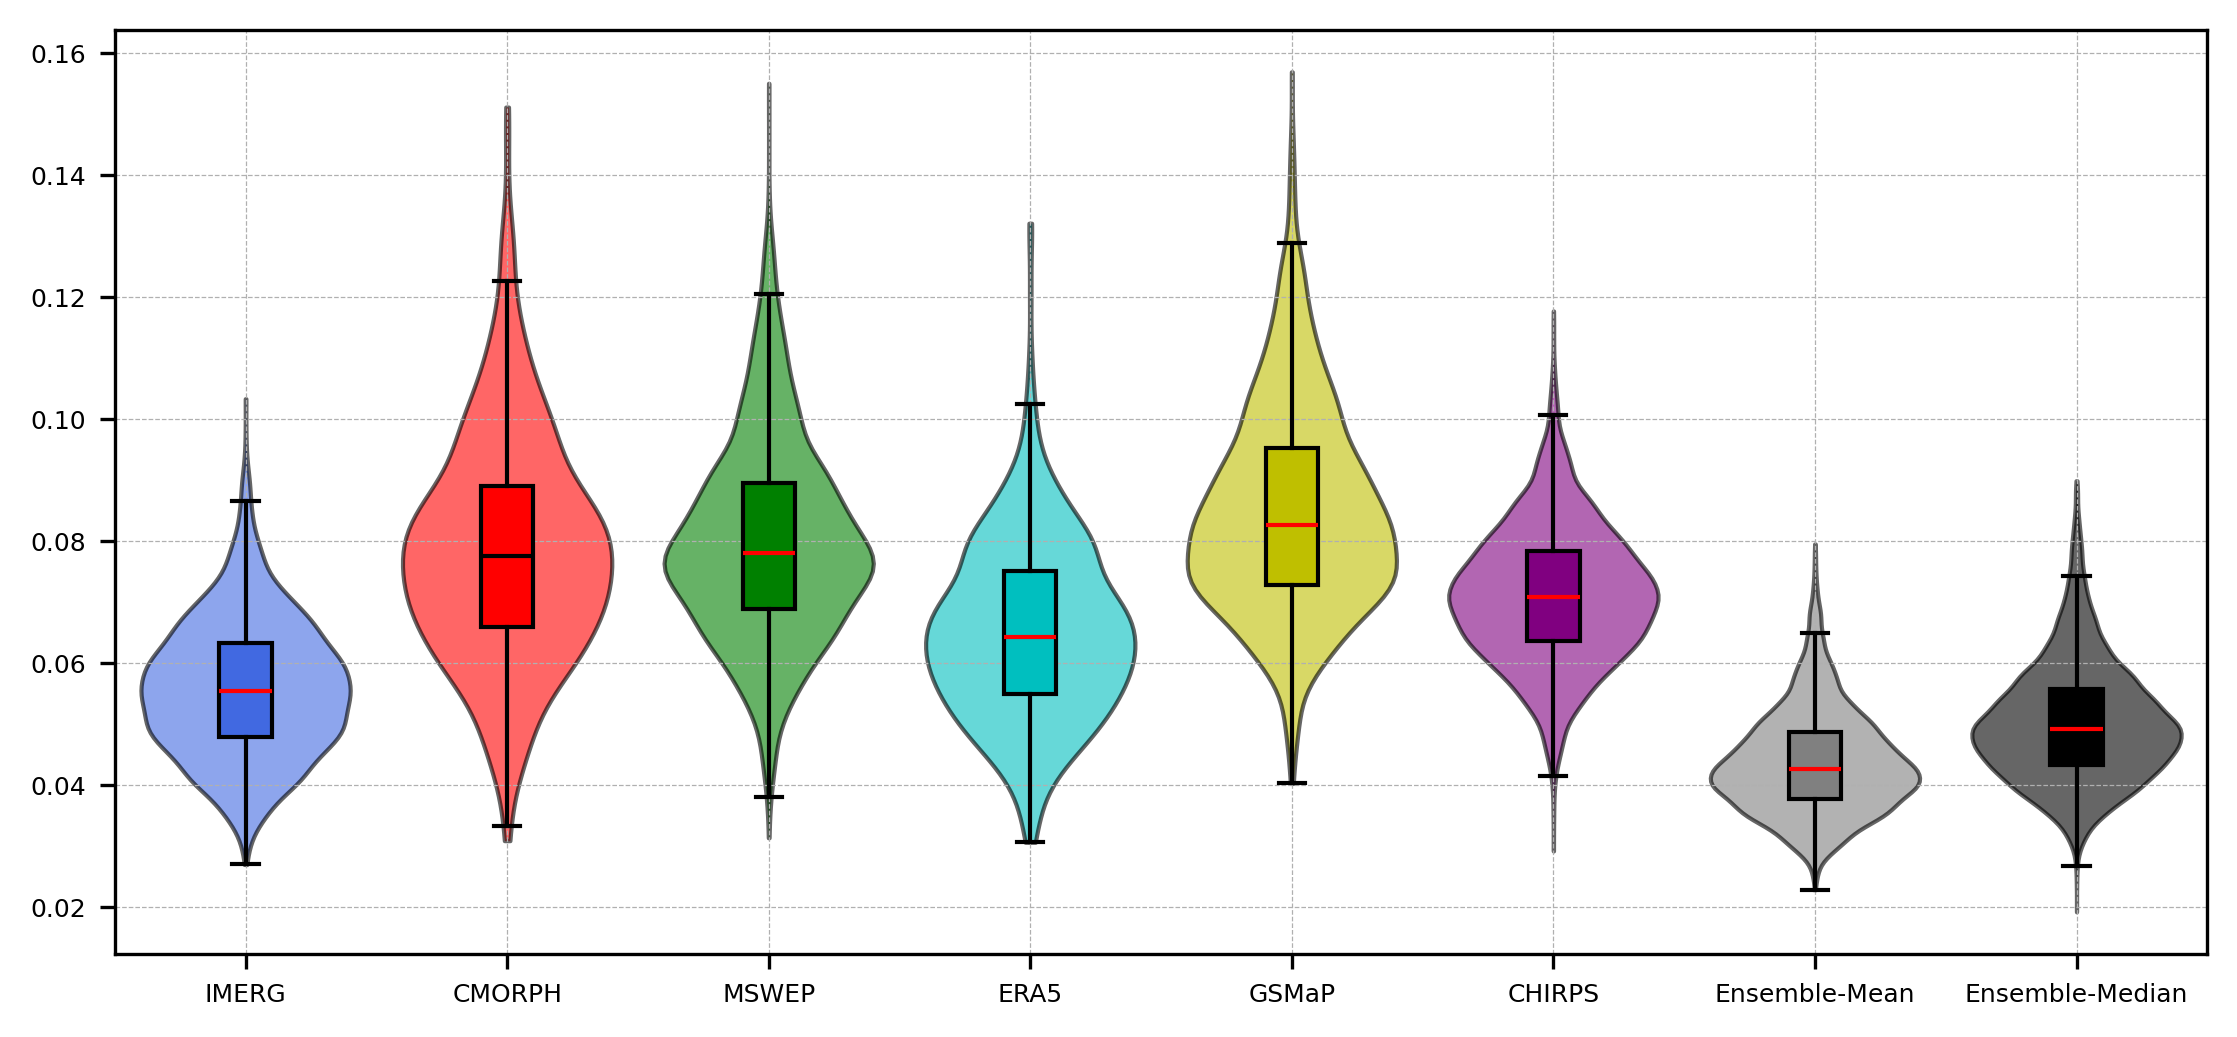

In [155]:
box_width = 0.8
x_pos = np.arange(0.5,41,2)

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])

meanprops=dict(linestyle='-',color="g",linewidth=1.5)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='r')

WYd_IM_std_flat = WYd_IM_std.values.flatten()
WYd_IM_std_rdy = WYd_IM_std_flat[~np.isnan(WYd_IM_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_IM_std_rdy,
    positions=[0],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[0])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_IM_std_rdy,
    positions=[0],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[0], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_CM_std_flat = WYd_CM_std.values.flatten()
WYd_CM_std_rdy = WYd_CM_std_flat[~np.isnan(WYd_CM_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_CM_std_rdy,
    positions=[1],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[1])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_CM_std_rdy,
    positions=[1],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[1], edgecolor='k'),
    medianprops=dict(color='k')
)

# ==========================================================================================
WYd_MS_std_flat = WYd_MS_std.values.flatten()
WYd_MS_std_rdy = WYd_MS_std_flat[~np.isnan(WYd_MS_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_MS_std_rdy,
    positions=[2],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[2])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_MS_std_rdy,
    positions=[2],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[2], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_ER_std_flat = WYd_ER_std.values.flatten()
WYd_ER_std_rdy = WYd_ER_std_flat[~np.isnan(WYd_ER_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_ER_std_rdy,
    positions=[3],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[3])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_ER_std_rdy,
    positions=[3],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[3], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_GS_std_flat = WYd_GS_std.values.flatten()
WYd_GS_std_rdy = WYd_GS_std_flat[~np.isnan(WYd_GS_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_GS_std_rdy,
    positions=[4],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[4])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_GS_std_rdy,
    positions=[4],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[4], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_CH_std_flat = WYd_CH_std.flatten()
WYd_CH_std_rdy = WYd_CH_std_flat[~np.isnan(WYd_CH_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_CH_std_rdy,
    positions=[5],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[5])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_CH_std_rdy,
    positions=[5],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[5], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_EN_mean_std_flat = WYd_EN_mean_std.values.flatten()
WYd_EN_mean_std_rdy = WYd_EN_mean_std_flat[~np.isnan(WYd_EN_mean_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('gray')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='gray', edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_EN_median_std_flat = WYd_EN_median_std.values.flatten()
WYd_EN_median_std_rdy = WYd_EN_median_std_flat[~np.isnan(WYd_EN_median_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('k')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='k', edgecolor='k'),
    medianprops=dict(color='r')
)

ax1.tick_params(axis='both', which='major', labelsize=6)

ax1.set_xticks(np.arange(8))
ax1.set_xticklabels(['IMERG','CMORPH','MSWEP','ERA5','GSMaP','CHIRPS','Ensemble-Mean','Ensemble-Median'])

# ==========================================================================================
plt.grid(linewidth=0.3, linestyle='--')
# ax1.set_ylim(5,60)

## Values of variables

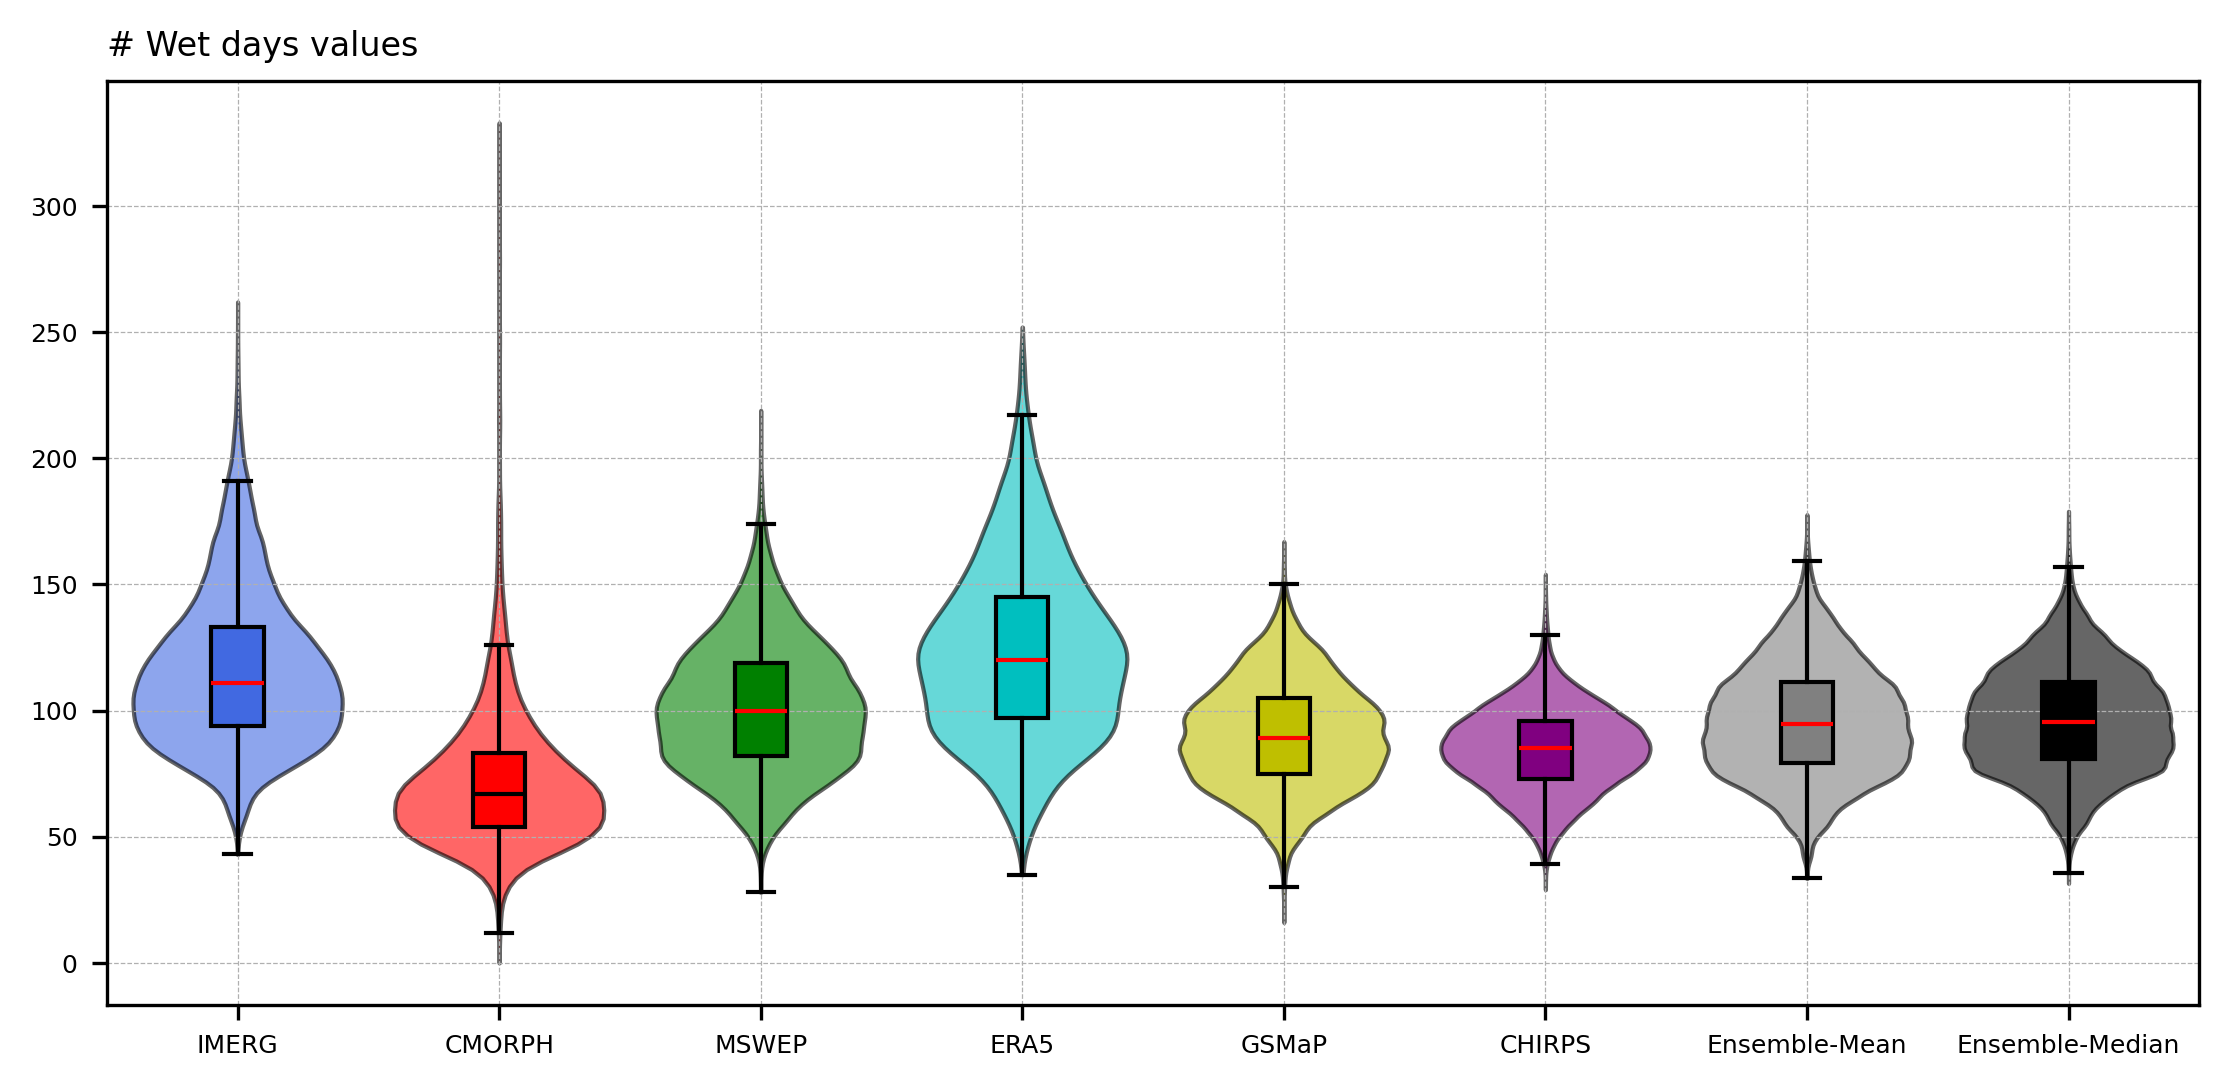

In [171]:
box_width = 0.8
x_pos = np.arange(0.5,41,2)

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])
NYd_IM_std_flat = NYd_IM.values.flatten()
NYd_IM_std_rdy = NYd_IM_std_flat[~np.isnan(NYd_IM_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_IM_std_rdy,
    positions=[0],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[0])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_IM_std_rdy,
    positions=[0],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[0], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_CM_std_flat = NYd_CM.values.flatten()
NYd_CM_std_rdy = NYd_CM_std_flat[~np.isnan(NYd_CM_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_CM_std_rdy,
    positions=[1],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[1])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_CM_std_rdy,
    positions=[1],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[1], edgecolor='k'),
    medianprops=dict(color='k')
)

# ==========================================================================================
NYd_MS_std_flat = NYd_MS.values.flatten()
NYd_MS_std_rdy = NYd_MS_std_flat[~np.isnan(NYd_MS_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_MS_std_rdy,
    positions=[2],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[2])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_MS_std_rdy,
    positions=[2],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[2], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_ER_std_flat = NYd_ER.values.flatten()
NYd_ER_std_rdy = NYd_ER_std_flat[~np.isnan(NYd_ER_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_ER_std_rdy,
    positions=[3],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[3])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_ER_std_rdy,
    positions=[3],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[3], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_GS_std_flat = NYd_GS.values.flatten()
NYd_GS_std_rdy = NYd_GS_std_flat[~np.isnan(NYd_GS_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_GS_std_rdy,
    positions=[4],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[4])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_GS_std_rdy,
    positions=[4],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[4], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_CH_std_flat = NYd_CH.values.flatten()
NYd_CH_std_rdy = NYd_CH_std_flat[~np.isnan(NYd_CH_std_flat)]
NYd_CH_std_rdy = NYd_CH_std_rdy[NYd_CH_std_rdy!=0]
SAT_violin = ax1.violinplot(
    NYd_CH_std_rdy,
    positions=[5],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[5])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_CH_std_rdy,
    positions=[5],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[5], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_EN_mean_std_flat = NYd_EN_mean.values.flatten()
NYd_EN_mean_std_rdy = NYd_EN_mean_std_flat[~np.isnan(NYd_EN_mean_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('gray')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='gray', edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
NYd_EN_median_std_flat = NYd_EN_median.values.flatten()
NYd_EN_median_std_rdy = NYd_EN_median_std_flat[~np.isnan(NYd_EN_median_std_flat)]
SAT_violin = ax1.violinplot(
    NYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('k')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    NYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='k', edgecolor='k'),
    medianprops=dict(color='r')
)

ax1.tick_params(axis='both', which='major', labelsize=6)

ax1.set_xticks(np.arange(8))
ax1.set_xticklabels(['IMERG','CMORPH','MSWEP','ERA5','GSMaP','CHIRPS','Ensemble-Mean','Ensemble-Median'])

# ==========================================================================================
ax1.set_title('# Wet days values', fontsize=8, loc='left')
plt.grid(linewidth=0.3, linestyle='--')
# ax1.set_ylim(5,60)

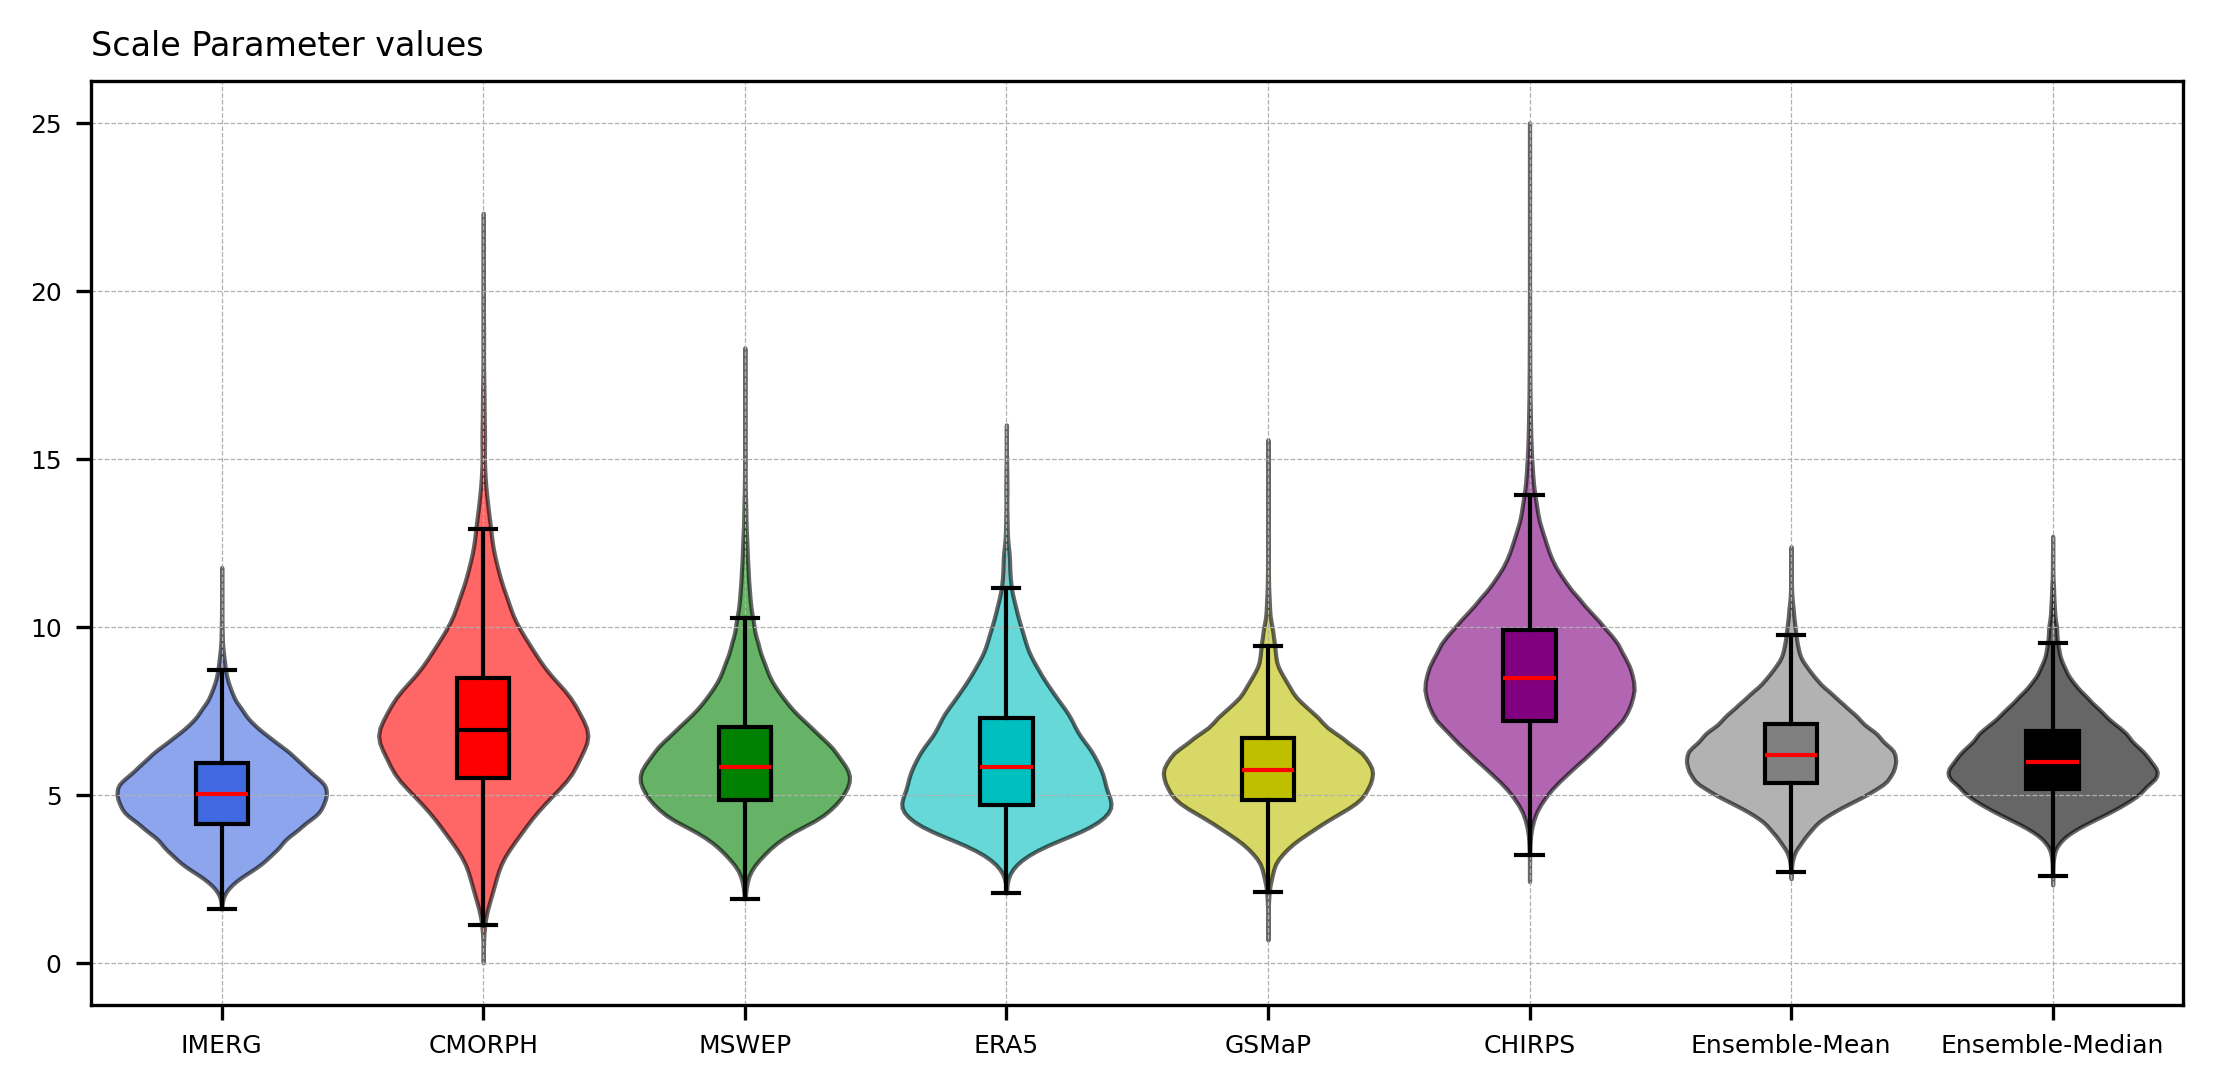

In [172]:
box_width = 0.8
x_pos = np.arange(0.5,41,2)

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])
CYd_IM_std_flat = CYd_IM.values.flatten()
CYd_IM_std_rdy = CYd_IM_std_flat[~np.isnan(CYd_IM_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_IM_std_rdy,
    positions=[0],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[0])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_IM_std_rdy,
    positions=[0],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[0], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_CM_std_flat = CYd_CM.values.flatten()
CYd_CM_std_rdy = CYd_CM_std_flat[~np.isnan(CYd_CM_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_CM_std_rdy,
    positions=[1],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[1])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_CM_std_rdy,
    positions=[1],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[1], edgecolor='k'),
    medianprops=dict(color='k')
)

# ==========================================================================================
CYd_MS_std_flat = CYd_MS.values.flatten()
CYd_MS_std_rdy = CYd_MS_std_flat[~np.isnan(CYd_MS_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_MS_std_rdy,
    positions=[2],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[2])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_MS_std_rdy,
    positions=[2],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[2], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_ER_std_flat = CYd_ER.values.flatten()
CYd_ER_std_rdy = CYd_ER_std_flat[~np.isnan(CYd_ER_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_ER_std_rdy,
    positions=[3],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[3])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_ER_std_rdy,
    positions=[3],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[3], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_GS_std_flat = CYd_GS.values.flatten()
CYd_GS_std_rdy = CYd_GS_std_flat[~np.isnan(CYd_GS_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_GS_std_rdy,
    positions=[4],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[4])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_GS_std_rdy,
    positions=[4],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[4], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_CH_std_flat = CYd_CH.values.flatten()
CYd_CH_std_rdy = CYd_CH_std_flat[~np.isnan(CYd_CH_std_flat)]
CYd_CH_std_rdy = CYd_CH_std_rdy[CYd_CH_std_rdy!=0]
SAT_violin = ax1.violinplot(
    CYd_CH_std_rdy,
    positions=[5],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[5])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_CH_std_rdy,
    positions=[5],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[5], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_EN_mean_std_flat = CYd_EN_mean.values.flatten()
CYd_EN_mean_std_rdy = CYd_EN_mean_std_flat[~np.isnan(CYd_EN_mean_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('gray')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='gray', edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
CYd_EN_median_std_flat = CYd_EN_median.values.flatten()
CYd_EN_median_std_rdy = CYd_EN_median_std_flat[~np.isnan(CYd_EN_median_std_flat)]
SAT_violin = ax1.violinplot(
    CYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('k')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    CYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='k', edgecolor='k'),
    medianprops=dict(color='r')
)

ax1.tick_params(axis='both', which='major', labelsize=6)

ax1.set_xticks(np.arange(8))
ax1.set_xticklabels(['IMERG','CMORPH','MSWEP','ERA5','GSMaP','CHIRPS','Ensemble-Mean','Ensemble-Median'])

# ==========================================================================================
ax1.set_title('Scale Parameter values', fontsize=8, loc='left')
plt.grid(linewidth=0.3, linestyle='--')
# ax1.set_ylim(5,60)

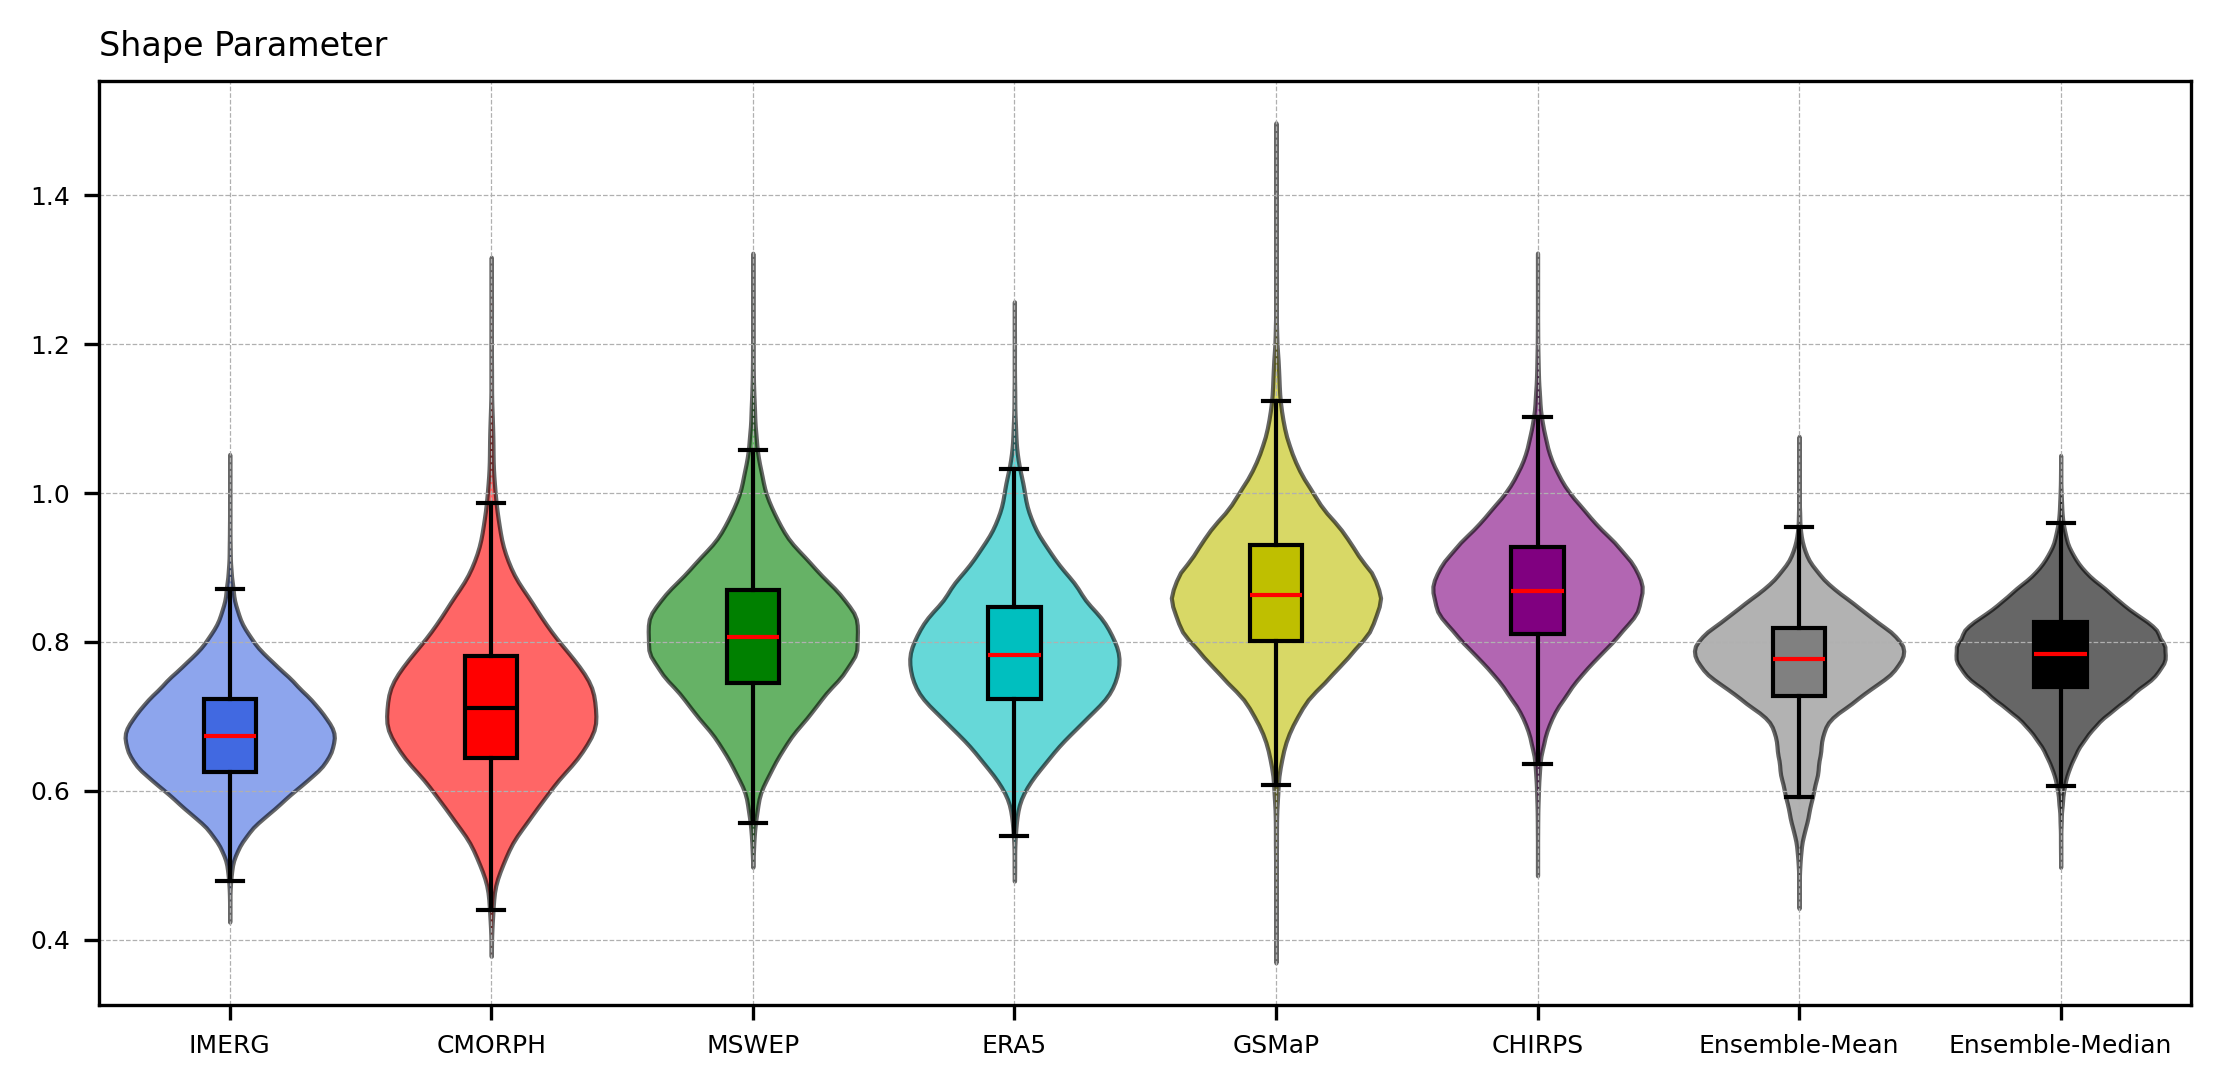

In [170]:
box_width = 0.8
x_pos = np.arange(0.5,41,2)

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])
WYd_IM_std_flat = WYd_IM.values.flatten()
WYd_IM_std_rdy = WYd_IM_std_flat[~np.isnan(WYd_IM_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_IM_std_rdy,
    positions=[0],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[0])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_IM_std_rdy,
    positions=[0],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[0], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_CM_std_flat = WYd_CM.values.flatten()
WYd_CM_std_rdy = WYd_CM_std_flat[~np.isnan(WYd_CM_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_CM_std_rdy,
    positions=[1],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[1])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_CM_std_rdy,
    positions=[1],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[1], edgecolor='k'),
    medianprops=dict(color='k')
)

# ==========================================================================================
WYd_MS_std_flat = WYd_MS.values.flatten()
WYd_MS_std_rdy = WYd_MS_std_flat[~np.isnan(WYd_MS_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_MS_std_rdy,
    positions=[2],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[2])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_MS_std_rdy,
    positions=[2],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[2], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_ER_std_flat = WYd_ER.values.flatten()
WYd_ER_std_rdy = WYd_ER_std_flat[~np.isnan(WYd_ER_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_ER_std_rdy,
    positions=[3],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[3])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_ER_std_rdy,
    positions=[3],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[3], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_GS_std_flat = WYd_GS.values.flatten()
WYd_GS_std_rdy = WYd_GS_std_flat[~np.isnan(WYd_GS_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_GS_std_rdy,
    positions=[4],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[4])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_GS_std_rdy,
    positions=[4],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[4], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_CH_std_flat = WYd_CH.values.flatten()
WYd_CH_std_rdy = WYd_CH_std_flat[~np.isnan(WYd_CH_std_flat)]
WYd_CH_std_rdy = WYd_CH_std_rdy[WYd_CH_std_rdy!=0]
SAT_violin = ax1.violinplot(
    WYd_CH_std_rdy,
    positions=[5],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor(colors[5])
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_CH_std_rdy,
    positions=[5],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor=colors[5], edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_EN_mean_std_flat = WYd_EN_mean.values.flatten()
WYd_EN_mean_std_rdy = WYd_EN_mean_std_flat[~np.isnan(WYd_EN_mean_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('gray')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_EN_mean_std_rdy,
    positions=[6],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='gray', edgecolor='k'),
    medianprops=dict(color='r')
)

# ==========================================================================================
WYd_EN_median_std_flat = WYd_EN_median.values.flatten()
WYd_EN_median_std_rdy = WYd_EN_median_std_flat[~np.isnan(WYd_EN_median_std_flat)]
SAT_violin = ax1.violinplot(
    WYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width,
    showmeans=False,
    showmedians=False,
    showextrema=False
)
for body in SAT_violin['bodies']:
    body.set_facecolor('k')
    body.set_edgecolor('k')
    body.set_alpha(0.6)
ax1.boxplot(
    WYd_EN_median_std_rdy,
    positions=[7],
    widths=box_width * 0.25,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='k', edgecolor='k'),
    medianprops=dict(color='r')
)

ax1.tick_params(axis='both', which='major', labelsize=6)

ax1.set_xticks(np.arange(8))
ax1.set_xticklabels(['IMERG','CMORPH','MSWEP','ERA5','GSMaP','CHIRPS','Ensemble-Mean','Ensemble-Median'])

# ==========================================================================================
ax1.set_title('Shape Parameter', fontsize=8, loc='left')
plt.grid(linewidth=0.3, linestyle='--')
# ax1.set_ylim(5,60)

In [113]:
def CDF(serie):
    ss_sorted = np.sort(serie)
    ss_cdf = np.arange(1, len(ss_sorted)+1) / len(ss_sorted)
    return ss_sorted, ss_cdf

In [116]:
ss_IM, CDF_IM = CDF(NYd_IM_std_rdy)
ss_EN_median, CDF_EN_median = CDF(NYd_EN_median_std_rdy)

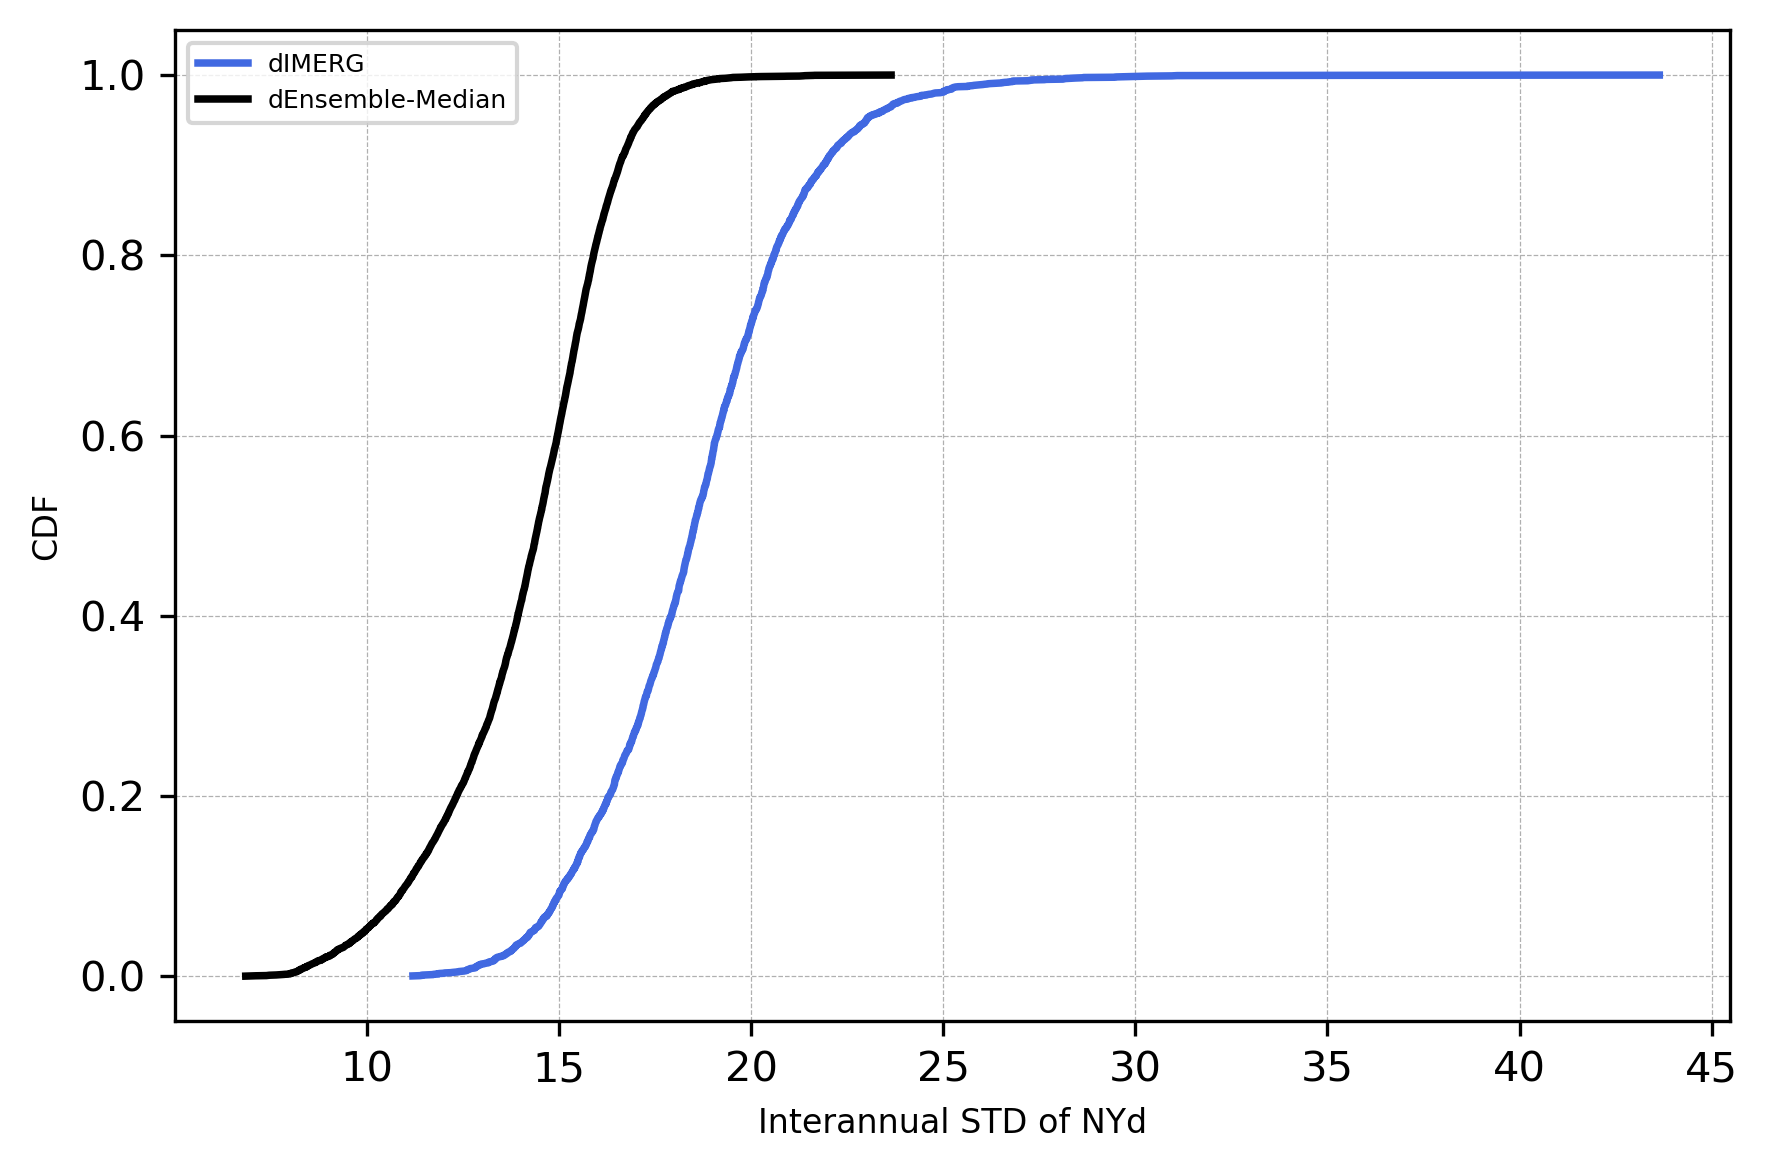

In [121]:
# Plot
fig, ax = plt.subplots(figsize=(6,4), dpi=300)

ax.plot(ss_IM, CDF_IM, color=colors[0], lw=1.8, label='dIMERG')
ax.plot(ss_EN_median, CDF_EN_median, color='k', lw=1.8, label='dEnsemble-Median')

ax.set_xlabel('Interannual STD of NYd', fontsize=8)
ax.set_ylabel('CDF', fontsize=8)
ax.grid(ls='--', lw=0.3)
ax.legend(fontsize=6)

plt.tight_layout()
plt.show()


<xarray.DataArray 'NYd' ()> Size: 8B
array(0.76072576)

<xarray.DataArray 'NYd' ()> Size: 8B
array(18.57569886)